# Welcome to the Workshop!

## Thank you for joining the workshop! All of the content covered in this session, including code examples, instruction on how to access the dataset, and additional resources, can be found in this [GitHub repository](https://github.com/Yusufii9/CNPRM2025-Conference---AI-for-Image-Analysis-Workshop/tree/main).

## Feel free to explore and refer back to the materials as needed throughout the workshop and beyond.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


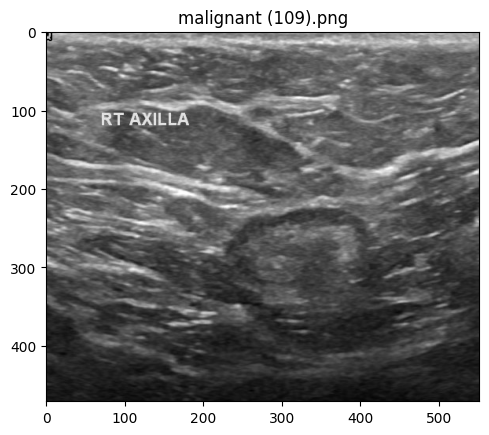

Image: malignant (109).png, Size: (552, 471), Mode: RGB


In [3]:
import os                              # for interacting with the operating system (listing files, joining paths)
from PIL import Image                  # PIL (Pillow) for opening and manipulating images
import matplotlib.pyplot as plt        # for displaying images in a plot

# Path to the directory containing malignant images
image_directory = '/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT/malignant'

# List all files in the directory, filtering to include only actual files (not subdirectories)
image_files = [
    f for f in os.listdir(image_directory)
    if os.path.isfile(os.path.join(image_directory, f))
]

# Iterate over each image file in the directory
for image_file in image_files:
    try:
        # Construct the full path to the image
        image_path = os.path.join(image_directory, image_file)

        # Open the image using Pillow
        img = Image.open(image_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.title(image_file)       # Show the filename as the title of the plot
        plt.show()

        # Print out basic metadata about the image
        # img.size is a tuple (width, height)
        # img.mode describes the pixel format (e.g., "RGB", "L" for grayscale)
        print(f"Image: {image_file}, Size: {img.size}, Mode: {img.mode}")

        # Stop after the first image (remove this break if you want to process all images)
        break

    except IOError:
        # Handle cases where the file cannot be opened as an image
        print(f"Error opening image file: {image_file}")


In [ ]:
# # One time run only
# # ====== STEP 1: PREPARE DATASET STRUCTURE (IGNORE MASKS) ======
# from pathlib import Path
# import os
# import shutil


# original_path = "/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT"
# prepared_path = "/content/drive/MyDrive/CNPRM Workshop/ultrasound_prepared_binary"

# classes = ['benign', 'malignant']
# for cls in classes:
#     Path(f"{prepared_path}/{cls}").mkdir(parents=True, exist_ok=True)

# for cls in classes:
#     class_dir = os.path.join(original_path, cls)
#     dest_dir = os.path.join(prepared_path, cls)
#     for file in os.listdir(class_dir):
#         if not "_mask" in file and file.lower().endswith((".png", ".jpg", ".jpeg")):
#             shutil.copy(os.path.join(class_dir, file), os.path.join(dest_dir, file))

# print("✅ Dataset cleaned and copied to:", prepared_path)

In [4]:
import os  # Importing the os module to interact with the operating system (e.g., file system)

prepared_path = "/content/drive/MyDrive/CNPRM Workshop/ultrasound_prepared_binary"  # Path to the directory containing prepared ultrasound images
classes = ['benign', 'malignant']  # List of class names corresponding to different categories of images

class_counts = {}  # Dictionary to store the count of files for each class
for class_name in classes:  # Loop through each class in the list
  class_path = os.path.join(prepared_path, class_name)  # Construct the full path to the class directory
  if os.path.exists(class_path):  # Check if the class directory exists
    class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])  # Count the number of files in the directory and store it
  else:
    class_counts[class_name] = 0  # If directory doesn't exist, set count to 0

class_counts  # Output the dictionary containing file counts for each class


{'benign': 437, 'malignant': 210}

# Model 1 (from scratch, no data augmentation, no hyperparameter tuning)

Epoch [1/10]
  Train Loss: 0.6924, Train Acc: 0.6518, F1: 0.1667
  Test  Loss: 0.5692, Test  Acc: 0.6769, F1: 0.0000
💾 Best model saved (test accuracy improved)!

Epoch [2/10]
  Train Loss: 0.6373, Train Acc: 0.6364, F1: 0.3037
  Test  Loss: 0.5974, Test  Acc: 0.6769, F1: 0.0000

Epoch [3/10]
  Train Loss: 0.5847, Train Acc: 0.6847, F1: 0.1093
  Test  Loss: 0.4900, Test  Acc: 0.7231, F1: 0.2500
💾 Best model saved (test accuracy improved)!

Epoch [4/10]
  Train Loss: 0.5225, Train Acc: 0.7505, F1: 0.5536
  Test  Loss: 0.4481, Test  Acc: 0.8000, F1: 0.5806
💾 Best model saved (test accuracy improved)!

Epoch [5/10]
  Train Loss: 0.4708, Train Acc: 0.7621, F1: 0.5831
  Test  Loss: 0.4195, Test  Acc: 0.8462, F1: 0.7297
💾 Best model saved (test accuracy improved)!

Epoch [6/10]
  Train Loss: 0.4347, Train Acc: 0.7737, F1: 0.6238
  Test  Loss: 0.3997, Test  Acc: 0.8077, F1: 0.6032

Epoch [7/10]
  Train Loss: 0.3895, Train Acc: 0.8124, F1: 0.6820
  Test  Loss: 0.3803, Test  Acc: 0.8231, F1: 0.

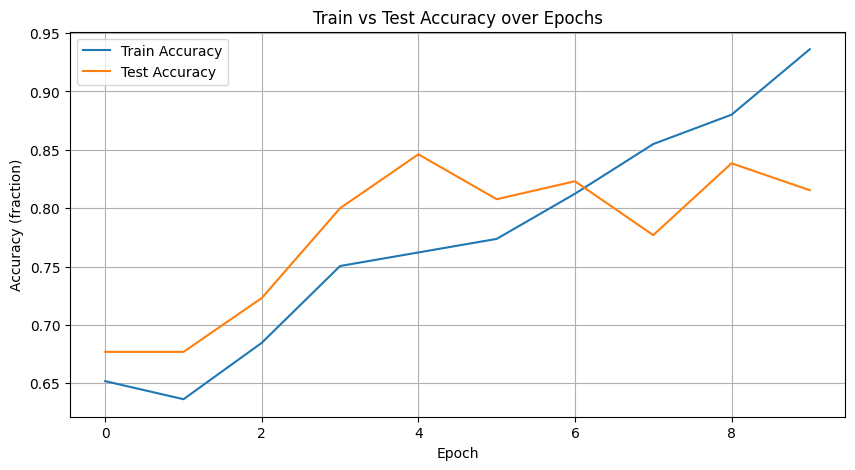

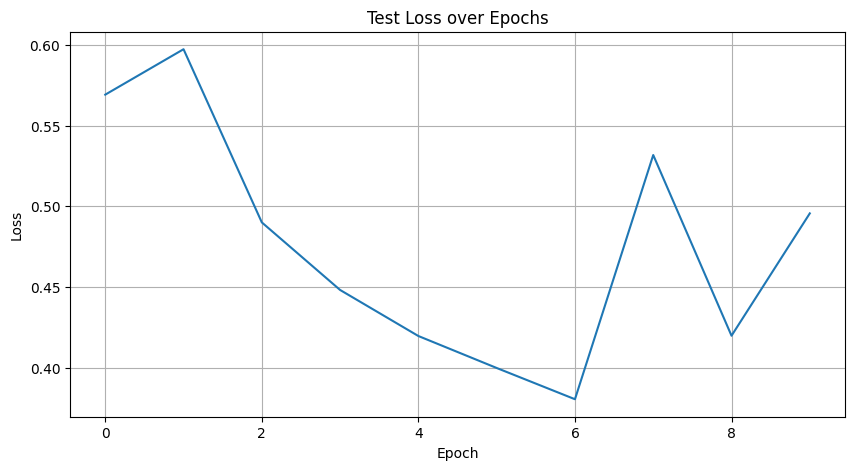

✅ Reloading the best saved model for final evaluation...


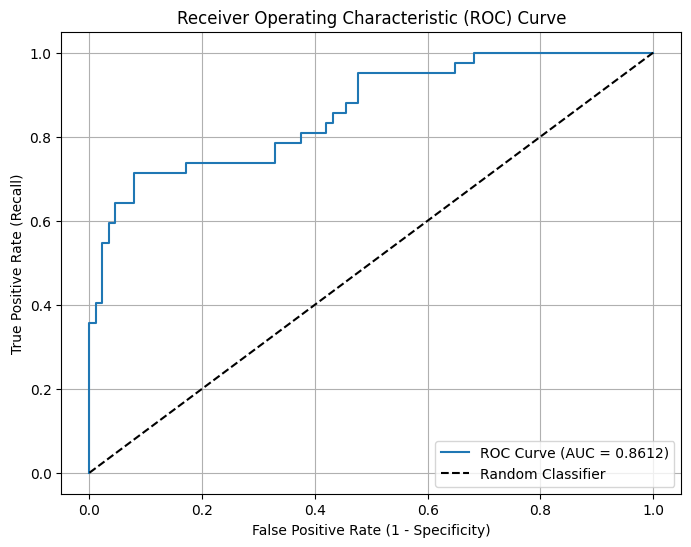


🔍 Custom Metrics Per Class:

Class: benign
  ➤ Support (n):    88

Class: malignant
  ➤ Support (n):    42

🔎 Overall Performance on Testing Set:
  ➤ Total Support (n): 130
  ➤ Overall Accuracy:  0.8462
  ➤ Recall:            0.6429
  ➤ Precision:         0.8438
  ➤ Specificity:       0.9432
  ➤ F1-score:          0.7297


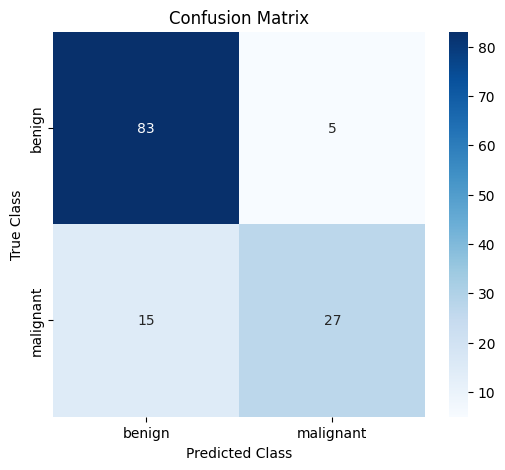

CPU times: user 1min 29s, sys: 4.7 s, total: 1min 34s
Wall time: 3min 59s


In [ ]:
# Model 1 Stratified

%%time

import os  # for interacting with the operating system (e.g., file operations)
import shutil  # for high-level file operations (e.g., copying, moving)
from pathlib import Path  # for object-oriented filesystem paths
import torch  # main PyTorch library for tensor operations and neural nets
import torch.nn as nn  # neural network modules and layers
import torch.optim as optim  # optimization algorithms like Adam, SGD
from torchvision import datasets, transforms  # dataset loaders and image transforms
from torch.utils.data import DataLoader, Subset  # utilities for batching and subsetting data
import matplotlib.pyplot as plt  # for plotting graphs and visualizations
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix  # evaluation metrics
from sklearn.model_selection import train_test_split  # to split data into train/test sets
import numpy as np  # numerical operations on arrays
import seaborn as sns  # statistical data visualization
import random  # Python’s built-in random number generator

# ====== STEP 1: SET RANDOM SEEDS FOR REPRODUCIBILITY ======
seed = 42  # arbitrary choice of seed value
random.seed(seed)  # set Python random seed
np.random.seed(seed)  # set NumPy random seed
torch.manual_seed(seed)  # set CPU PyTorch random seed
torch.cuda.manual_seed(seed)  # set single-GPU PyTorch random seed
torch.cuda.manual_seed_all(seed)  # set multi-GPU PyTorch random seed
torch.backends.cudnn.deterministic = True  # make CUDA convolution deterministic
torch.backends.cudnn.benchmark = False  # disable benchmarking for reproducibility

# ====== STEP 2: SETUP TRANSFORMS ======
transform = transforms.Compose([  # compose several image transforms
    transforms.Grayscale(),  # convert images to single-channel grayscale
    transforms.Resize((224, 224)),  # resize images to 224x224 pixels
    transforms.ToTensor()  # convert PIL images to PyTorch tensors and scale to [0,1]
])

# ====== STEP 3: LOAD DATA WITH STRATIFIED SPLIT ======
dataset = datasets.ImageFolder(root=prepared_path, transform=transform)  # load images from folders, applying transforms
labels = [label for _, label in dataset]  # extract labels for stratification
train_idx, test_idx = train_test_split(
    list(range(len(dataset))),  # indices of all samples
    stratify=labels,  # ensure train/test have same label distribution
    test_size=0.2,  # 20% of data for testing
    random_state=42  # seed for reproducibility
)
train_dataset = Subset(dataset, train_idx)  # create training subset
test_dataset = Subset(dataset, test_idx)  # create testing subset

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # batch and shuffle training data
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # batch without shuffling for testing

# ====== STEP 4: DEFINE CNN MODEL WITH DYNAMIC FLATTENING ======
class SimpleCNN(nn.Module):  # define a simple convolutional neural network
    def __init__(self):
        super(SimpleCNN, self).__init__()  # call parent constructor
        self.features = nn.Sequential(  # feature extraction layers
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # conv layer: 1→32 channels
            nn.ReLU(),  # activation function
            nn.MaxPool2d(2),  # downsample by factor of 2

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # conv layer: 32→64 channels
            nn.ReLU(),  # activation function
            nn.MaxPool2d(2),  # downsample

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # conv layer: 64→128 channels
            nn.ReLU(),  # activation function
            nn.MaxPool2d(2),  # downsample
        )

        # compute flattened feature size dynamically
        with torch.no_grad():  # disable gradient tracking
            dummy_input = torch.zeros(1, 1, 224, 224)  # single fake image tensor
            flattened_size = self.features(dummy_input).view(1, -1).size(1)  # number of features after flatten

        self.classifier = nn.Sequential(  # classification layers
            nn.Flatten(),  # flatten feature map to vector
            nn.Linear(flattened_size, 256),  # fully connected layer
            nn.ReLU(),  # activation function
            nn.Linear(256, 1)  # output single logit for binary classification
        )

    def forward(self, x):  # define forward pass
        x = self.features(x)  # apply conv layers
        x = self.classifier(x)  # apply classifier layers
        return x  # return raw output logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # choose GPU if available
model = SimpleCNN().to(device)  # instantiate model and move to device

# ====== STEP 5: TRAINING SETUP ======
criterion = nn.BCEWithLogitsLoss()  # loss combining sigmoid and binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 1e-3

# ====== STEP 6: TRAIN THE MODEL ======
num_epochs = 10  # number of full passes through the training data
train_accuracies = []  # to record training accuracies
test_accuracies = []  # to record testing accuracies
test_losses = []  # to record testing losses

for epoch in range(num_epochs):  # loop over each epoch
    model.train()  # set model to training mode
    running_loss = 0.0  # accumulate training loss
    correct = 0  # count correct predictions
    total = 0  # count total samples
    all_train_preds = []  # store all train predictions
    all_train_labels = []  # store all train labels

    for images, labels in train_loader:  # iterate over training batches
        images, labels = images.to(device), labels.to(device)  # move data to device
        outputs = model(images)  # forward pass
        labels = labels.float().unsqueeze(1)  # reshape labels to match outputs
        loss = criterion(outputs, labels)  # compute loss
        optimizer.zero_grad()  # reset gradients
        loss.backward()  # backpropagate
        optimizer.step()  # update model parameters

        running_loss += loss.item()  # add batch loss
        probs = torch.sigmoid(outputs)  # convert logits to probabilities
        predicted = (probs > 0.5).long().squeeze(1)  # threshold at 0.5
        total += labels.size(0)  # update sample count
        correct += predicted.eq(labels.long().squeeze(1)).sum().item()  # count correct

        all_train_preds.extend(predicted.cpu().numpy())  # collect preds
        all_train_labels.extend(labels.cpu().numpy())  # collect labels

    train_accuracy = correct / total  # compute train accuracy
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')  # compute train F1
    train_accuracies.append(train_accuracy)  # record train accuracy

    model.eval()  # set model to evaluation mode
    test_loss = 0.0  # accumulate test loss
    correct = 0  # reset correct count
    total = 0  # reset total count
    all_test_preds = []  # store test predictions
    all_test_labels = []  # store test labels

    with torch.no_grad():  # disable gradient tracking
        for images, labels in test_loader:  # iterate over test batches
            images, labels = images.to(device), labels.to(device)  # move to device
            outputs = model(images)  # forward pass
            labels = labels.float().unsqueeze(1)  # reshape labels
            loss = criterion(outputs, labels)  # compute loss
            test_loss += loss.item()  # add batch loss

            predicted = (outputs > 0.5).long().squeeze(1)  # threshold at 0.5
            total += labels.size(0)  # update sample count
            correct += predicted.eq(labels.long().squeeze(1)).sum().item()  # count correct

            all_test_preds.extend(predicted.cpu().numpy())  # collect preds
            all_test_labels.extend(labels.cpu().numpy())  # collect labels

    avg_test_loss = test_loss / len(test_loader)  # average test loss
    test_accuracy = correct / total  # compute test accuracy
    test_f1 = f1_score(all_test_labels, all_test_preds, average='binary')  # compute test F1
    test_accuracies.append(test_accuracy)  # record test accuracy
    test_losses.append(avg_test_loss)  # record test loss

    # print epoch metrics
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.4f}, F1: {train_f1:.4f}")
    print(f"  Test  Loss: {avg_test_loss:.4f}, Test  Acc: {test_accuracy:.4f}, F1: {test_f1:.4f}")

    # save model if test accuracy improved
    if epoch == 0 or test_accuracy > max(test_accuracies[:-1]):
        torch.save(model.state_dict(), "/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model1_best_acc_model_lr1e-3.pt")
        print("💾 Best model saved (test accuracy improved)!\n")
    else:
        print()

# ====== STEP 8: PLOT TRAINING VS. TESTING ACCURACY ======
plt.figure(figsize=(10, 5))  # create a figure for accuracy
plt.plot(train_accuracies, label="Train Accuracy")  # plot training accuracy
plt.plot(test_accuracies, label="Test Accuracy")  # plot testing accuracy
plt.title("Train vs Test Accuracy over Epochs")  # title
plt.xlabel("Epoch")  # x-axis label, python uses zero-based indexing (first element starts from 0)
plt.ylabel("Accuracy (fraction)")  # y-axis label
plt.legend()  # show legend
plt.grid(True)  # enable grid
plt.show()  # display plot

plt.figure(figsize=(10, 5))  # figure for test loss
plt.plot(test_losses, label="Test Loss")  # plot loss
plt.title("Test Loss over Epochs")  # title
plt.xlabel("Epoch")  # x-axis label
plt.ylabel("Loss")  # y-axis label
plt.grid(True)  # enable grid
plt.show()  # display plot

# ====== STEP 9: FINAL CUSTOM METRICS ======
print("✅ Reloading the best saved model for final evaluation...")  # notify user
model.load_state_dict(torch.load("/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model1_best_acc_model_lr1e-3.pt"))  # load best model

# Collect predictions
all_preds = []  # to store predicted labels
all_labels = []  # to store true labels
all_probs = []  # to store predicted probabilities

model.eval()  # evaluation mode
with torch.no_grad():  # no gradients
    for images, labels in test_loader:  # iterate test set
        images = images.to(device)  # move images to device
        outputs = model(images)  # get logits
        probs = torch.sigmoid(outputs).squeeze(1).cpu().numpy()  # convert to probabilities
        predicted = (outputs > 0.5).long().squeeze(1)  # threshold to get predictions

        all_probs.extend(probs)  # collect probabilities
        all_preds.extend(predicted.cpu().numpy())  # collect predictions
        all_labels.extend(labels.numpy())  # collect true labels

# ====== STEP 10: ROC CURVE ======
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)  # compute ROC curve
roc_auc = roc_auc_score(all_labels, all_probs)  # compute AUC score

plt.figure(figsize=(8, 6))  # ROC plot
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")  # plot ROC
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")  # 45° line for random guess
plt.xlabel("False Positive Rate (1 - Specificity)")  # x-axis label
plt.ylabel("True Positive Rate (Recall)")  # y-axis label
plt.title("Receiver Operating Characteristic (ROC) Curve")  # title
plt.legend(loc="lower right")  # legend position
plt.grid(True)  # grid
plt.show()  # display plot

# ====== STEP 11: CUSTOM METRICS CONTINUED ======
conf_matrix = confusion_matrix(all_labels, all_preds)  # compute confusion matrix
print("\n🔍 Custom Metrics Per Class:")  # header

classes = dataset.classes  # list of class names
num_classes = len(classes)  # number of classes

total_support = 0  # cumulative support
recall_sum = 0  # sum of recalls
precision_sum = 0  # sum of precisions
specificity_sum = 0  # sum of specificities
f1_sum = 0  # sum of F1 scores

for i in range(num_classes):  # iterate over classes
    TP = conf_matrix[1, 1]  # true positives for positive class
    FP = conf_matrix[:, 1].sum() - TP  # false positives
    FN = conf_matrix[1, :].sum() - TP  # false negatives
    TN = conf_matrix.sum() - (TP + FP + FN)  # true negatives

    support = conf_matrix[i, :].sum()  # number of samples for class i
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0  # recall calculation
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0  # precision calculation
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0  # specificity calculation
    accuracy = (TP + TN) / conf_matrix.sum()  # overall accuracy
    f1 = f1_score(all_labels, all_preds, labels=[1], average='binary')  # F1 for positive class

    print(f"\nClass: {classes[i]}")  # print class name
    print(f"  ➤ Support (n):    {support}")  # print support

    total_support += support  # accumulate support
    recall_sum += recall  # accumulate recall
    precision_sum += precision  # accumulate precision
    specificity_sum += specificity  # accumulate specificity
    f1_sum += f1  # accumulate F1

# ====== STEP 12: OVERALL PERFORMANCE ======
overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)  # sum of diagonal divided by total
recall = recall_sum / num_classes  # macro-average recall
precision = precision_sum / num_classes  # macro-average precision
specificity = specificity_sum / num_classes  # macro-average specificity
f1 = f1_sum / num_classes  # macro-average F1

print("\n🔎 Overall Performance on Testing Set:")  # header for overall results
print(f"  ➤ Total Support (n): {total_support}")  # print total support
print(f"  ➤ Overall Accuracy:  {overall_accuracy:.4f}")  # print overall accuracy
print(f"  ➤ Recall:            {recall:.4f}")  # print recall
print(f"  ➤ Precision:         {precision:.4f}")  # print precision
print(f"  ➤ Specificity:       {specificity:.4f}")  # print specificity
print(f"  ➤ F1-score:          {f1:.4f}")  # print F1-score

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))  # figure for confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",  # draw heatmap with annotations
            xticklabels=classes, yticklabels=classes)  # label axes with class names
plt.title("Confusion Matrix")  # title
plt.xlabel("Predicted Class")  # x-axis label
plt.ylabel("True Class")  # y-axis label
plt.show()  # display plot


# Model 2 (CNN Script with Data Augmentation on Minority Class)

Epoch [1/10]
  Train Loss: 0.7328, Train Acc: 0.6480, F1: 0.1875
  Test  Loss: 0.5157, Test  Acc: 0.6769, F1: 0.0000
📅 Best model saved (test accuracy improved)!

Epoch [2/10]
  Train Loss: 0.5944, Train Acc: 0.6886, F1: 0.3686
  Test  Loss: 0.6034, Test  Acc: 0.6769, F1: 0.0000

Epoch [3/10]
  Train Loss: 0.5621, Train Acc: 0.7253, F1: 0.4180
  Test  Loss: 0.4462, Test  Acc: 0.8000, F1: 0.5667
📅 Best model saved (test accuracy improved)!

Epoch [4/10]
  Train Loss: 0.4602, Train Acc: 0.7756, F1: 0.6133
  Test  Loss: 0.3482, Test  Acc: 0.8462, F1: 0.7059
📅 Best model saved (test accuracy improved)!

Epoch [5/10]
  Train Loss: 0.3518, Train Acc: 0.8569, F1: 0.7628
  Test  Loss: 0.3870, Test  Acc: 0.8308, F1: 0.7500

Epoch [6/10]
  Train Loss: 0.2397, Train Acc: 0.9033, F1: 0.8503
  Test  Loss: 0.3811, Test  Acc: 0.8615, F1: 0.7500
📅 Best model saved (test accuracy improved)!

Epoch [7/10]
  Train Loss: 0.1309, Train Acc: 0.9458, F1: 0.9152
  Test  Loss: 0.4475, Test  Acc: 0.8538, F1: 0.

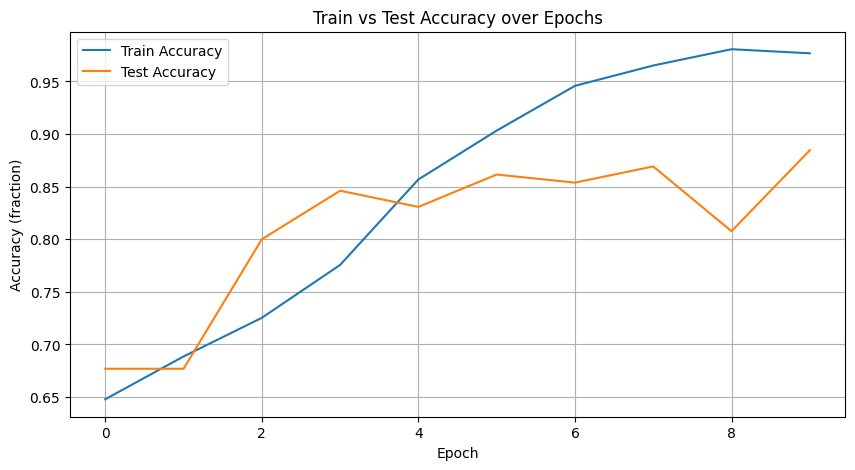

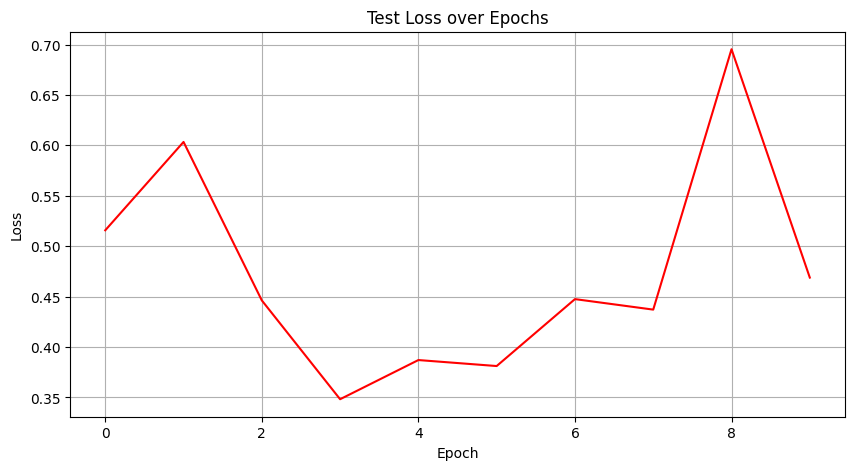

✅ Reloading the best saved model for final evaluation...


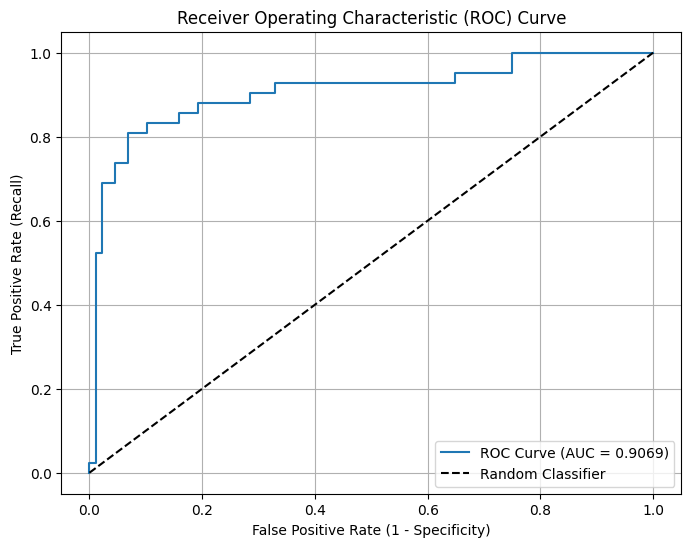


🔍 Custom Metrics Per Class:

Class: benign
  ➤ Support (n):    88

Class: malignant
  ➤ Support (n):    42

🔎 Overall Performance on Testing Set:
  ➤ Total Support (n): 130
  ➤ Overall Accuracy:  0.8846
  ➤ Recall:            0.7857
  ➤ Precision:         0.8462
  ➤ Specificity:       0.9318
  ➤ F1-score:          0.8148


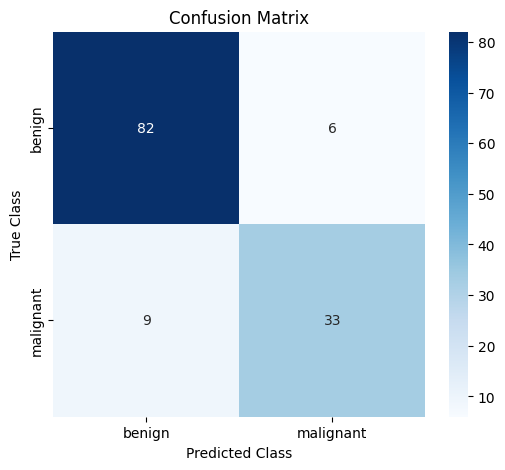

CPU times: user 1min 34s, sys: 4.47 s, total: 1min 38s
Wall time: 2min 21s


In [ ]:
# Model 2 with stratified split

%%time

import os
import shutil
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, ConcatDataset
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import random

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # if using multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ====== STEP 2: DEFINE CLASS-SPECIFIC TRANSFORMS ======
augmented_transform = transforms.Compose([
    transforms.Grayscale(),

    # Randomly crop and resize the image to 224x224 pixels.
    # The scale parameter defines the range of the original image size to sample from.
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),

    # Randomly flip the image horizontally with a 50% probability.
    transforms.RandomHorizontalFlip(),

    # Randomly rotate the image by up to ±15 degrees.
    transforms.RandomRotation(15),

    # Apply a random affine transformation with no rotation (degrees=0),
    # but with random scaling between 80% and 120%.
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),

    # Normalize the image tensor with mean=0.5 and std=0.5 for grayscale images.
    transforms.Normalize((0.5,), (0.5,))
])


non_augmented_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = non_augmented_transform

# ====== STEP 3: LOAD DATA AND APPLY AUGMENTATION TO MINORITY ONLY ======
raw_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
class_to_idx = raw_dataset.class_to_idx
targets = [label for _, label in raw_dataset]
counts = Counter(targets)
minority_class = min(counts, key=counts.get)
majority_class = max(counts, key=counts.get)

minority_indices = [i for i, (_, label) in enumerate(raw_dataset) if label == minority_class]
majority_indices = [i for i, (_, label) in enumerate(raw_dataset) if label == majority_class]

minority_dataset = Subset(raw_dataset, minority_indices)
minority_dataset.dataset.transform = augmented_transform

majority_dataset = Subset(raw_dataset, majority_indices)
majority_dataset.dataset.transform = non_augmented_transform

combined_dataset = ConcatDataset([minority_dataset, majority_dataset])
combined_targets = [targets[i] for i in minority_indices + majority_indices]

train_idx, test_idx = train_test_split(
    list(range(len(combined_dataset))), stratify=combined_targets, test_size=0.2, random_state=42
)
train_subset = Subset(combined_dataset, train_idx)
test_subset = Subset(combined_dataset, test_idx)

train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

# ====== STEP 4: DEFINE CNN MODEL ======
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 224, 224)
            flattened_size = self.features(dummy_input).view(1, -1).size(1)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# ====== STEP 5: TRAINING SETUP ======
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ====== STEP 6: TRAIN THE MODEL ======
num_epochs = 10
train_accuracies = []
test_accuracies = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_train_preds = []
    all_train_labels = []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        labels = labels.float().unsqueeze(1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        probs = torch.sigmoid(outputs)
        predicted = (probs > 0.5).long().squeeze(1)
        total += labels.size(0)
        correct += predicted.eq(labels.long().squeeze(1)).sum().item()
        all_train_preds.extend(predicted.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    train_accuracy = correct / total
    train_f1 = f1_score(all_train_labels, all_train_preds, average='binary')
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            labels = labels.float().unsqueeze(1)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predicted = (outputs > 0.5).long().squeeze(1)
            total += labels.size(0)
            correct += predicted.eq(labels.long().squeeze(1)).sum().item()
            all_test_preds.extend(predicted.cpu().numpy())
            all_test_labels.extend(labels.cpu().numpy())

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct / total
    test_f1 = f1_score(all_test_labels, all_test_preds, average='binary')
    test_accuracies.append(test_accuracy)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.4f}, F1: {train_f1:.4f}")
    print(f"  Test  Loss: {avg_test_loss:.4f}, Test  Acc: {test_accuracy:.4f}, F1: {test_f1:.4f}")

    if epoch == 0 or test_accuracy > max(test_accuracies[:-1]):
        torch.save(model.state_dict(), "/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model2_best_acc_model_lr1e-3.pt")
        print("📅 Best model saved (test accuracy improved)!\n")
    else:
        print()

# ====== STEP 7: PLOT ACCURACY & LOSS ======
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.title("Train vs Test Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (fraction)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_losses, color='red', label="Test Loss")
plt.title("Test Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ====== STEP 9: FINAL CUSTOM METRICS ======
print("✅ Reloading the best saved model for final evaluation...")
model.load_state_dict(torch.load("/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model2_best_acc_model_lr1e-3.pt"))

# Collect predictions
all_preds = []
all_labels = []
all_probs = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).squeeze(1).cpu().numpy()
        predicted = (outputs > 0.5).long().squeeze(1)

        all_probs.extend(probs)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# ====== STEP 10: ROC CURVE ======
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ====== STEP 11: CUSTOM METRICS CONTINUED ======
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\n🔍 Custom Metrics Per Class:")

classes = raw_dataset.classes
num_classes = len(classes)

total_support = 0
recall_sum = 0
precision_sum = 0
specificity_sum = 0
f1_sum = 0

for i in range(num_classes):
    TP = conf_matrix[1, 1]
    FP = conf_matrix[:, 1].sum() - TP
    FN = conf_matrix[1, :].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)

    support = conf_matrix[i, :].sum()
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0
    accuracy = (TP + TN) / conf_matrix.sum()
    f1 = f1_score(all_labels, all_preds, labels=[1], average='binary')

    print(f"\nClass: {classes[i]}")
    print(f"  ➤ Support (n):    {support}")

    total_support += support
    recall_sum += recall
    precision_sum += precision
    specificity_sum += specificity
    f1_sum += f1

# ====== STEP 12: OVERALL PERFORMANCE ======
overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
recall = recall_sum / num_classes
precision = precision_sum / num_classes
specificity = specificity_sum / num_classes
f1 = f1_sum / num_classes

print("\n🔎 Overall Performance on Testing Set:")
print(f"  ➤ Total Support (n): {total_support}")
print(f"  ➤ Overall Accuracy:  {overall_accuracy:.4f}")
print(f"  ➤ Recall:            {recall:.4f}")
print(f"  ➤ Precision:         {precision:.4f}")
print(f"  ➤ Specificity:       {specificity:.4f}")
print(f"  ➤ F1-score:          {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Model 3 (Cross-Validation)

Testing: lr=0.001, wd=0.0, dropout=0.0, optimizer=AdamW
Fold 1 - Support: Counter({np.float32(0.0): 69, np.float32(1.0): 35}), Acc: 0.8269, Rec: 0.6286, Prec: 0.8148, Spec: 0.9275, F1: 0.7097
Fold 2 - Support: Counter({np.float32(0.0): 69, np.float32(1.0): 35}), Acc: 0.8654, Rec: 0.6857, Prec: 0.8889, Spec: 0.9565, F1: 0.7742
Fold 3 - Support: Counter({np.float32(0.0): 69, np.float32(1.0): 34}), Acc: 0.6505, Rec: 0.5882, Prec: 0.4762, Spec: 0.6812, F1: 0.5263
Fold 4 - Support: Counter({np.float32(0.0): 68, np.float32(1.0): 35}), Acc: 0.6990, Rec: 0.4000, Prec: 0.5833, Spec: 0.8529, F1: 0.4746
Fold 5 - Support: Counter({np.float32(0.0): 68, np.float32(1.0): 35}), Acc: 0.7282, Rec: 0.4000, Prec: 0.6667, Spec: 0.8971, F1: 0.5000
Average Accuracy across folds: 0.7540
[INFO] New best model found with lr0.001_wd0.0_dr0.0_optAdamW!
Testing: lr=0.001, wd=0.0, dropout=0.0, optimizer=Adam
Fold 1 - Support: Counter({np.float32(0.0): 69, np.float32(1.0): 35}), Acc: 0.7692, Rec: 0.7429, Prec: 0.634

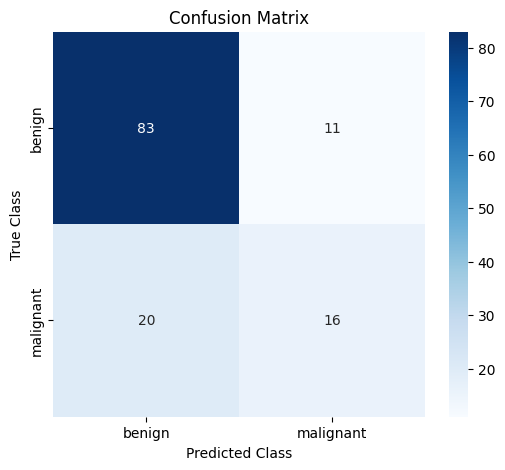

CPU times: user 2h 10min 48s, sys: 5min 32s, total: 2h 16min 21s
Wall time: 3h 11min 22s


In [ ]:
%%time

import warnings
warnings.filterwarnings('ignore')
import os
import shutil
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, accuracy_score)
import numpy as np
import seaborn as sns
from collections import Counter
import random
import re

# ====== SETUP ======
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== DEFINE TRANSFORMS ======
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

augmented_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ====== LOAD DATASET WITHOUT TRANSFORM INITIALLY ======
full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
train_targets = [full_dataset[i][1] for i in train_dataset.indices]

# ====== CROSS-VALIDATION SETUP ======
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ====== HYPERPARAMETER SEARCH SPACE ======
learning_rates = [1e-3, 1e-4]
weight_decays = [0.0, 1e-4]
dropout_rates = [0.0, 0.25, 0.5]
optimizers = ['AdamW', 'Adam', 'SGD']

best_accuracy = 0.0
best_hparams = ""

# ====== MODEL DEFINITION ======
class SimpleCNN(nn.Module):
    def __init__(self, dropout_rate):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 224, 224)
            flattened_size = self.features(dummy_input).view(1, -1).size(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# ====== HYPERPARAMETER TUNING LOOP ======
for lr in learning_rates:
    for wd in weight_decays:
        for dr in dropout_rates:
            for opt_type in optimizers:
                print(f"Testing: lr={lr}, wd={wd}, dropout={dr}, optimizer={opt_type}")
                fold_accuracies = []
                metrics_per_fold = []

                save_dir = f"/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model3_lr{lr}_wd{wd}_dr{dr}_opt{opt_type}"
                os.makedirs(save_dir, exist_ok=True)

                for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(train_targets)), train_targets)):
                    model = SimpleCNN(dropout_rate=dr).to(device)
                    if opt_type == 'AdamW':
                        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
                    elif opt_type == 'Adam':
                        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    else:
                        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd, momentum=0.9)

                    criterion = nn.BCEWithLogitsLoss()
                    train_subset = Subset(datasets.ImageFolder(root=prepared_path, transform=augmented_transform),
                                          [train_dataset.indices[i] for i in train_idx])
                    val_subset = Subset(datasets.ImageFolder(root=prepared_path, transform=transform),
                                        [train_dataset.indices[i] for i in val_idx])

                    train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
                    val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

                    for epoch in range(10):
                        model.train()
                        for images, labels in train_loader:
                            images, labels = images.to(device), labels.to(device)
                            labels = labels.float().unsqueeze(1)
                            outputs = model(images)
                            loss = criterion(outputs, labels)
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()

                    model.eval()
                    all_preds, all_labels = [], []
                    with torch.no_grad():
                        for images, labels in val_loader:
                            images, labels = images.to(device), labels.to(device)
                            labels = labels.float().unsqueeze(1)
                            outputs = model(images)
                            probs = torch.sigmoid(outputs)
                            predicted = (probs > 0.5).int()
                            all_preds.extend(predicted.cpu().numpy().flatten())
                            all_labels.extend(labels.cpu().numpy().flatten())

                    cm = confusion_matrix(all_labels, all_preds)
                    TN, FP, FN, TP = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
                    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0
                    recall = recall_score(all_labels, all_preds)
                    precision = precision_score(all_labels, all_preds)
                    accuracy = accuracy_score(all_labels, all_preds)
                    f1 = f1_score(all_labels, all_preds, average='binary')
                    support = Counter(all_labels)

                    print(f"Fold {fold+1} - Support: {support}, Acc: {accuracy:.4f}, Rec: {recall:.4f}, Prec: {precision:.4f}, Spec: {specificity:.4f}, F1: {f1:.4f}")
                    metrics_per_fold.append({
                        'Fold': fold + 1,
                        'Support': dict(support),
                        'Accuracy': accuracy,
                        'Recall': recall,
                        'Precision': precision,
                        'Specificity': specificity,
                        'F1_score': f1
                    })
                    fold_accuracies.append(accuracy)

                    # Save model for this fold
                    fold_model_path = os.path.join(save_dir, f"fold_{fold+1}.pt")
                    torch.save(model.state_dict(), fold_model_path)

                avg_accuracy = np.mean(fold_accuracies)
                print(f"Average Accuracy across folds: {avg_accuracy:.4f}")

                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_hparams = f"lr{lr}_wd{wd}_dr{dr}_opt{opt_type}"
                    print(f"[INFO] New best model found with {best_hparams}!")

                    # Save metrics
                    metrics_path = os.path.join(save_dir, "metrics_per_fold.txt")
                    with open(metrics_path, 'w') as f:
                        for m in metrics_per_fold:
                            f.write(str(m) + "\n")

print(f"\nBest Accuracy from cross-validation: {best_accuracy:.4f} with hyperparams: {best_hparams}")

# ====== FINAL TEST EVALUATION ======
match = re.search(r"dr(0\.0+|0\.25|0\.5)", best_hparams)
dropout_rate = float(match.group(1)) if match else 0.25

test_dataset.dataset.transform = transform
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

all_fold_preds = []
for i in range(1, 6):
    model_path = f"/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model3_{best_hparams}/fold_{i}.pt"
    model = SimpleCNN(dropout_rate=dropout_rate).to(device)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    fold_preds = []
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            fold_preds.append(probs.cpu().numpy())
    all_fold_preds.append(np.vstack(fold_preds))

avg_preds = np.mean(np.stack(all_fold_preds), axis=0)
binary_preds = (avg_preds > 0.5).astype(int).flatten()

true_labels = []
for _, labels in test_loader:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

conf_matrix = confusion_matrix(true_labels, binary_preds)
if conf_matrix.shape == (2, 2):
    TN, FP, FN, TP = conf_matrix.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0
support = Counter(true_labels)

classes = full_dataset.classes
num_classes = len(classes)

print("\n=== Final Test Set Evaluation ===")
print(f"  ➤ Total Support (n): {dict(support)}")
print(f"  ➤ Overall Accuracy:  {accuracy_score(true_labels, binary_preds):.4f}")
print(f"  ➤ Recall:            {recall_score(true_labels, binary_preds):.4f}")
print(f"  ➤ Precision:         {precision_score(true_labels, binary_preds):.4f}")
print(f"  ➤ Specificity:       {specificity:.4f}")
print(f"  ➤ F1-score:    {f1_score(true_labels, binary_preds, average='binary'):.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Model 4 (Nested cross-validation)

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.5000 | Precision=0.6364 | Specificity=0.8636 | F1_macro=0.5600 
  Fold 2 | n=130 | Accuracy=0.7692 | Recall=0.3810 | Precision=0.8000 | Specificity=0.9545 | F1_macro=0.5161 
  Fold 3 | n=129 | Accuracy=0.7519 | Recall=0.5714 | Precision=0.6316 | Specificity=0.8391 | F1_macro=0.6000 
  Fold 4 | n=129 | Accuracy=0.7674 | Recall=0.4048 | Precision=0.7727 | Specificity=0.9425 | F1_macro=0.5312 
  Fold 5 | n=129 | Accuracy=0.7752 | Recall=0.3810 | Precision=0.8421 | Specificity=0.9655 | F1_macro=0.5246 
Average accuracy:     0.7620
Average recall:       0.4476
Average precision:    0.7121
Average specificity:  0.9131
Average f1:           0.5497



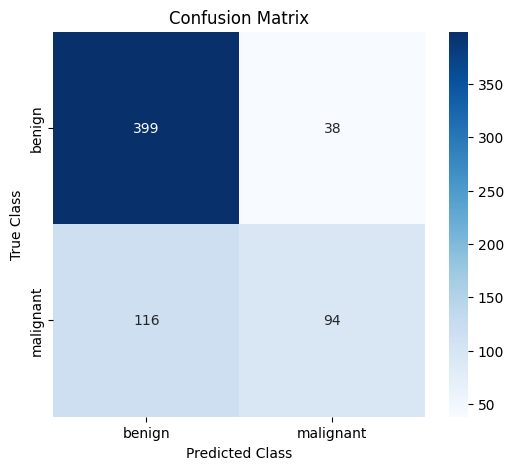

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7385 | Recall=0.3571 | Precision=0.6818 | Specificity=0.9205 | F1_macro=0.4688 
  Fold 2 | n=130 | Accuracy=0.8000 | Recall=0.4762 | Precision=0.8333 | Specificity=0.9545 | F1_macro=0.6061 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.5000 | Precision=0.8077 | Specificity=0.9425 | F1_macro=0.6176 
  Fold 4 | n=129 | Accuracy=0.7752 | Recall=0.6190 | Precision=0.6667 | Specificity=0.8506 | F1_macro=0.6420 
  Fold 5 | n=129 | Accuracy=0.7442 | Recall=0.3571 | Precision=0.7143 | Specificity=0.9310 | F1_macro=0.4762 
Average accuracy:     0.7713
Average recall:       0.4619
Average precision:    0.7348
Average specificity:  0.9198
Average f1:           0.5673



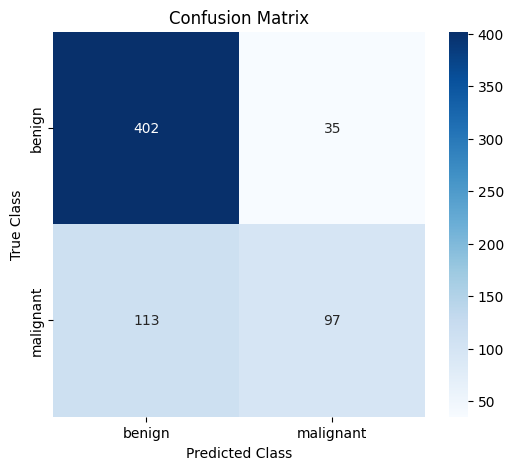

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7231 | Recall=0.6905 | Precision=0.5577 | Specificity=0.7386 | F1_macro=0.6170 
  Fold 2 | n=130 | Accuracy=0.7308 | Recall=0.1667 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.2857 
  Fold 3 | n=129 | Accuracy=0.7752 | Recall=0.4762 | Precision=0.7407 | Specificity=0.9195 | F1_macro=0.5797 
  Fold 4 | n=129 | Accuracy=0.7674 | Recall=0.6667 | Precision=0.6364 | Specificity=0.8161 | F1_macro=0.6512 
  Fold 5 | n=129 | Accuracy=0.7597 | Recall=0.3571 | Precision=0.7895 | Specificity=0.9540 | F1_macro=0.4918 
Average accuracy:     0.7512
Average recall:       0.4714
Average precision:    0.6644
Average specificity:  0.8857
Average f1:           0.5515



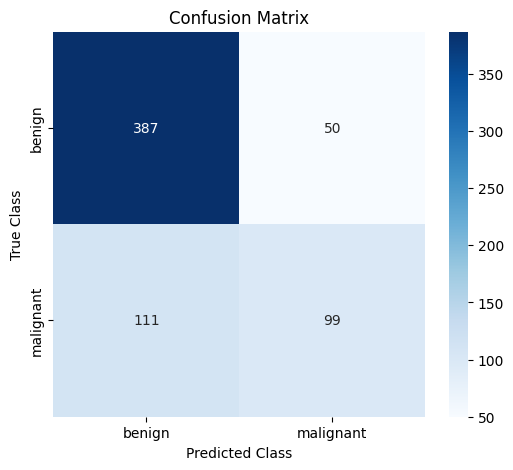

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.4762 | Precision=0.6452 | Specificity=0.8750 | F1_macro=0.5479 
  Fold 2 | n=130 | Accuracy=0.7231 | Recall=0.1429 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.2500 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.3810 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.5517 
  Fold 4 | n=129 | Accuracy=0.7519 | Recall=0.6905 | Precision=0.6042 | Specificity=0.7816 | F1_macro=0.6444 
  Fold 5 | n=129 | Accuracy=0.7519 | Recall=0.3571 | Precision=0.7500 | Specificity=0.9425 | F1_macro=0.4839 
Average accuracy:     0.7543
Average recall:       0.4095
Average precision:    0.7107
Average specificity:  0.9198
Average f1:           0.5196



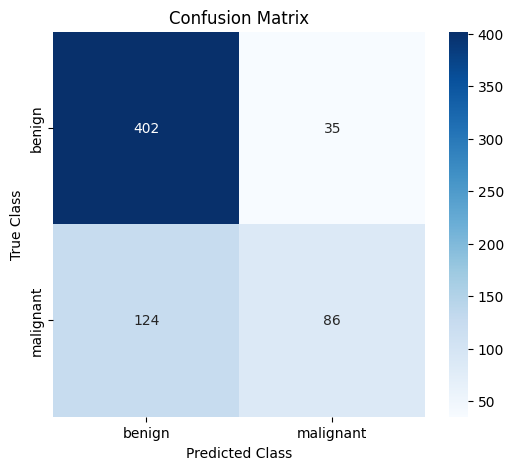

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7308 | Recall=0.1667 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.2857 
  Fold 2 | n=130 | Accuracy=0.7385 | Recall=0.4048 | Precision=0.6538 | Specificity=0.8977 | F1_macro=0.5000 
  Fold 3 | n=129 | Accuracy=0.7287 | Recall=0.5476 | Precision=0.5897 | Specificity=0.8161 | F1_macro=0.5679 
  Fold 4 | n=129 | Accuracy=0.7829 | Recall=0.4286 | Precision=0.8182 | Specificity=0.9540 | F1_macro=0.5625 
  Fold 5 | n=129 | Accuracy=0.7132 | Recall=0.4524 | Precision=0.5758 | Specificity=0.8391 | F1_macro=0.5067 
Average accuracy:     0.7388
Average recall:       0.4000
Average precision:    0.6614
Average specificity:  0.9014
Average f1:           0.4985



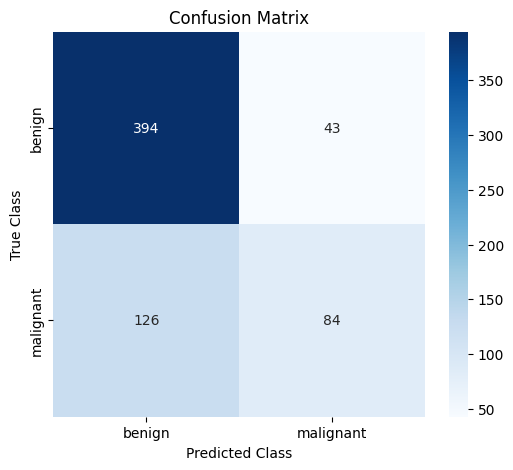

Testing params: {'dropout_rate': 0.0, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7308 | Recall=0.4286 | Precision=0.6207 | Specificity=0.8750 | F1_macro=0.5070 
  Fold 2 | n=130 | Accuracy=0.7000 | Recall=0.0952 | Precision=0.8000 | Specificity=0.9886 | F1_macro=0.1702 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.7907 | Recall=0.6190 | Precision=0.7027 | Specificity=0.8736 | F1_macro=0.6582 
  Fold 5 | n=129 | Accuracy=0.7519 | Recall=0.3333 | Precision=0.7778 | Specificity=0.9540 | F1_macro=0.4667 
Average accuracy:     0.7295
Average recall:       0.2952
Average precision:    0.6966
Average specificity:  0.9382
Average f1:           0.4147



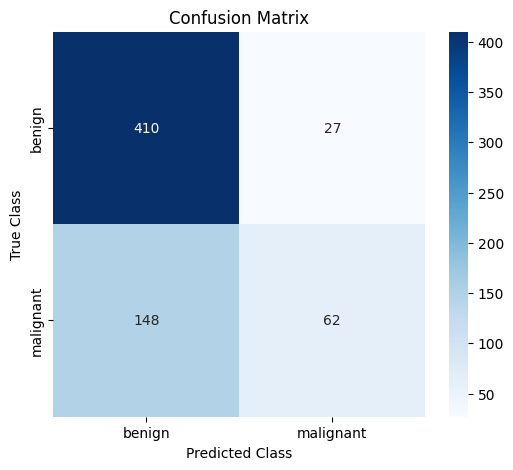

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7154 | Recall=0.6190 | Precision=0.5532 | Specificity=0.7614 | F1_macro=0.5843 
  Fold 2 | n=130 | Accuracy=0.8000 | Recall=0.4762 | Precision=0.8333 | Specificity=0.9545 | F1_macro=0.6061 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.5000 | Precision=0.8077 | Specificity=0.9425 | F1_macro=0.6176 
  Fold 4 | n=129 | Accuracy=0.7597 | Recall=0.5714 | Precision=0.6486 | Specificity=0.8506 | F1_macro=0.6076 
  Fold 5 | n=129 | Accuracy=0.7752 | Recall=0.3810 | Precision=0.8421 | Specificity=0.9655 | F1_macro=0.5246 
Average accuracy:     0.7697
Average recall:       0.5095
Average precision:    0.6993
Average specificity:  0.8949
Average f1:           0.5895



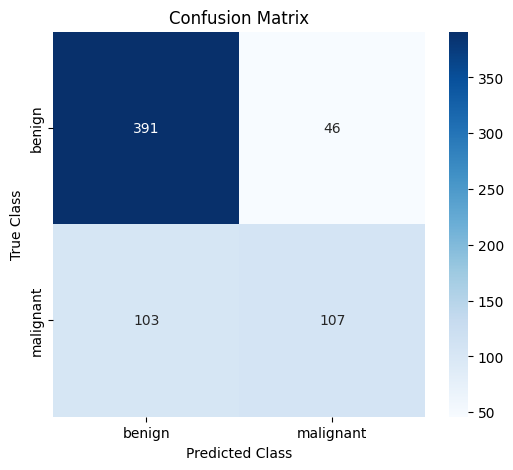

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7385 | Recall=0.7619 | Precision=0.5714 | Specificity=0.7273 | F1_macro=0.6531 
  Fold 2 | n=130 | Accuracy=0.7769 | Recall=0.3810 | Precision=0.8421 | Specificity=0.9659 | F1_macro=0.5246 
  Fold 3 | n=129 | Accuracy=0.7907 | Recall=0.5238 | Precision=0.7586 | Specificity=0.9195 | F1_macro=0.6197 
  Fold 4 | n=129 | Accuracy=0.7907 | Recall=0.5952 | Precision=0.7143 | Specificity=0.8851 | F1_macro=0.6494 
  Fold 5 | n=129 | Accuracy=0.7597 | Recall=0.3810 | Precision=0.7619 | Specificity=0.9425 | F1_macro=0.5079 
Average accuracy:     0.7713
Average recall:       0.5286
Average precision:    0.6937
Average specificity:  0.8881
Average f1:           0.6000



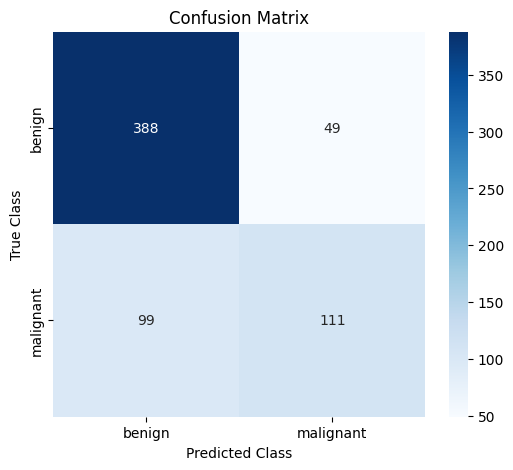

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.5476 | Precision=0.6216 | Specificity=0.8409 | F1_macro=0.5823 
  Fold 2 | n=130 | Accuracy=0.7846 | Recall=0.4048 | Precision=0.8500 | Specificity=0.9659 | F1_macro=0.5484 
  Fold 3 | n=129 | Accuracy=0.7597 | Recall=0.5952 | Precision=0.6410 | Specificity=0.8391 | F1_macro=0.6173 
  Fold 4 | n=129 | Accuracy=0.7907 | Recall=0.7857 | Precision=0.6471 | Specificity=0.7931 | F1_macro=0.7097 
  Fold 5 | n=129 | Accuracy=0.7519 | Recall=0.4286 | Precision=0.6923 | Specificity=0.9080 | F1_macro=0.5294 
Average accuracy:     0.7666
Average recall:       0.5524
Average precision:    0.6705
Average specificity:  0.8694
Average f1:           0.6057



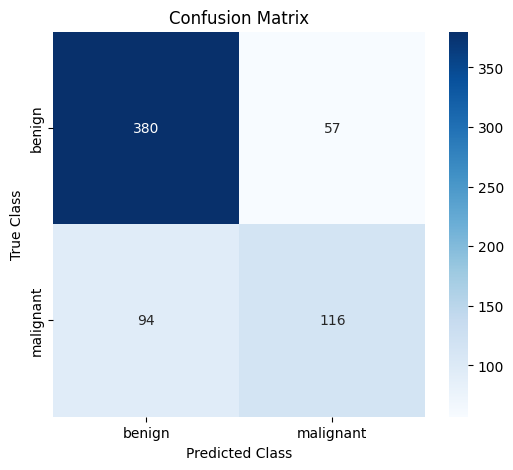

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7308 | Recall=0.6905 | Precision=0.5686 | Specificity=0.7500 | F1_macro=0.6237 
  Fold 2 | n=130 | Accuracy=0.7923 | Recall=0.4048 | Precision=0.8947 | Specificity=0.9773 | F1_macro=0.5574 
  Fold 3 | n=129 | Accuracy=0.8062 | Recall=0.5000 | Precision=0.8400 | Specificity=0.9540 | F1_macro=0.6269 
  Fold 4 | n=129 | Accuracy=0.7829 | Recall=0.5238 | Precision=0.7333 | Specificity=0.9080 | F1_macro=0.6111 
  Fold 5 | n=129 | Accuracy=0.7674 | Recall=0.3333 | Precision=0.8750 | Specificity=0.9770 | F1_macro=0.4828 
Average accuracy:     0.7759
Average recall:       0.4905
Average precision:    0.7305
Average specificity:  0.9133
Average f1:           0.5869



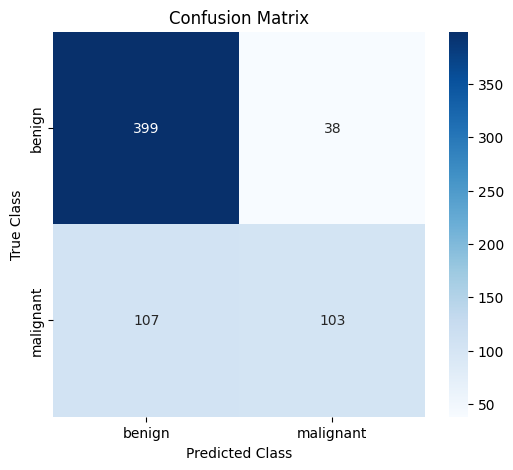

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



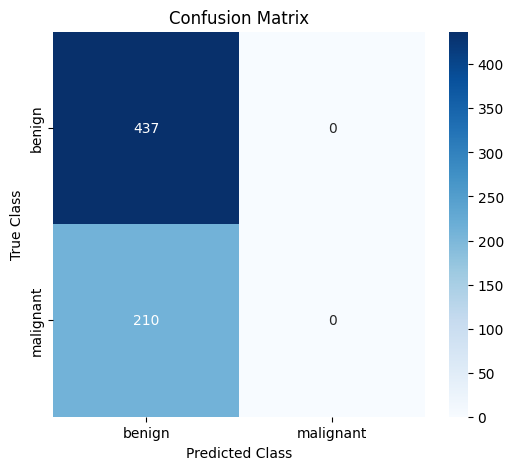

Testing params: {'dropout_rate': 0.0, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



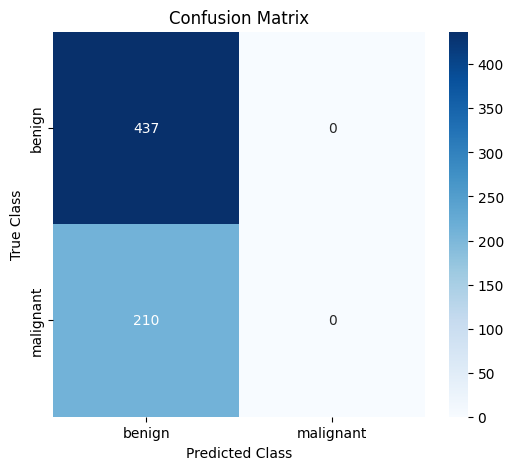

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.3810 | Precision=0.8000 | Specificity=0.9545 | F1_macro=0.5161 
  Fold 2 | n=130 | Accuracy=0.7692 | Recall=0.4524 | Precision=0.7308 | Specificity=0.9205 | F1_macro=0.5588 
  Fold 3 | n=129 | Accuracy=0.7752 | Recall=0.5000 | Precision=0.7241 | Specificity=0.9080 | F1_macro=0.5915 
  Fold 4 | n=129 | Accuracy=0.8217 | Recall=0.6190 | Precision=0.7879 | Specificity=0.9195 | F1_macro=0.6933 
  Fold 5 | n=129 | Accuracy=0.5891 | Recall=0.6429 | Precision=0.4154 | Specificity=0.5632 | F1_macro=0.5047 
Average accuracy:     0.7450
Average recall:       0.5190
Average precision:    0.6301
Average specificity:  0.8532
Average f1:           0.5692



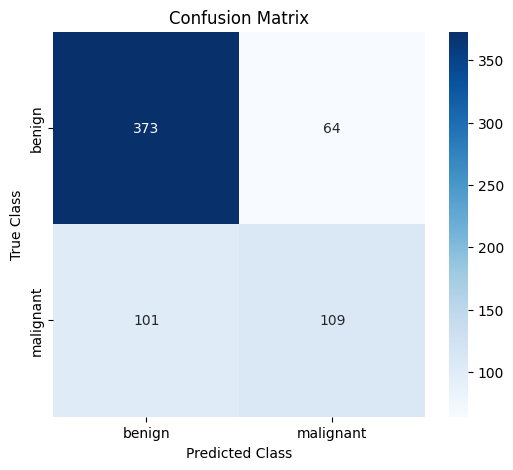

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.5238 | Precision=0.6875 | Specificity=0.8864 | F1_macro=0.5946 
  Fold 2 | n=130 | Accuracy=0.7923 | Recall=0.4048 | Precision=0.8947 | Specificity=0.9773 | F1_macro=0.5574 
  Fold 3 | n=129 | Accuracy=0.7519 | Recall=0.3095 | Precision=0.8125 | Specificity=0.9655 | F1_macro=0.4483 
  Fold 4 | n=129 | Accuracy=0.7907 | Recall=0.6190 | Precision=0.7027 | Specificity=0.8736 | F1_macro=0.6582 
  Fold 5 | n=129 | Accuracy=0.7674 | Recall=0.3571 | Precision=0.8333 | Specificity=0.9655 | F1_macro=0.5000 
Average accuracy:     0.7743
Average recall:       0.4429
Average precision:    0.7623
Average specificity:  0.9336
Average f1:           0.5602



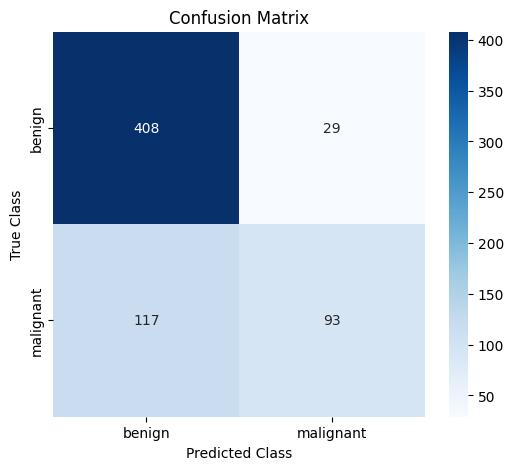

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.4286 | Precision=0.6667 | Specificity=0.8977 | F1_macro=0.5217 
  Fold 2 | n=130 | Accuracy=0.7615 | Recall=0.2619 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.4151 
  Fold 3 | n=129 | Accuracy=0.7907 | Recall=0.7143 | Precision=0.6667 | Specificity=0.8276 | F1_macro=0.6897 
  Fold 4 | n=129 | Accuracy=0.7597 | Recall=0.5238 | Precision=0.6667 | Specificity=0.8736 | F1_macro=0.5867 
  Fold 5 | n=129 | Accuracy=0.7674 | Recall=0.3333 | Precision=0.8750 | Specificity=0.9770 | F1_macro=0.4828 
Average accuracy:     0.7651
Average recall:       0.4524
Average precision:    0.7197
Average specificity:  0.9152
Average f1:           0.5556



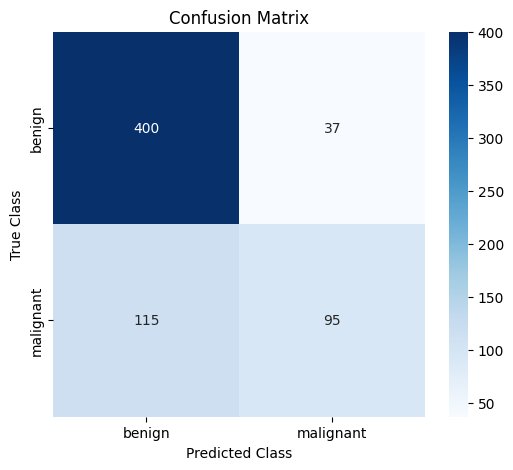

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7615 | Recall=0.5238 | Precision=0.6667 | Specificity=0.8750 | F1_macro=0.5867 
  Fold 2 | n=130 | Accuracy=0.7538 | Recall=0.5952 | Precision=0.6250 | Specificity=0.8295 | F1_macro=0.6098 
  Fold 3 | n=129 | Accuracy=0.7907 | Recall=0.5000 | Precision=0.7778 | Specificity=0.9310 | F1_macro=0.6087 
  Fold 4 | n=129 | Accuracy=0.7519 | Recall=0.4762 | Precision=0.6667 | Specificity=0.8851 | F1_macro=0.5556 
  Fold 5 | n=129 | Accuracy=0.7597 | Recall=0.3095 | Precision=0.8667 | Specificity=0.9770 | F1_macro=0.4561 
Average accuracy:     0.7635
Average recall:       0.4810
Average precision:    0.6966
Average specificity:  0.8995
Average f1:           0.5690



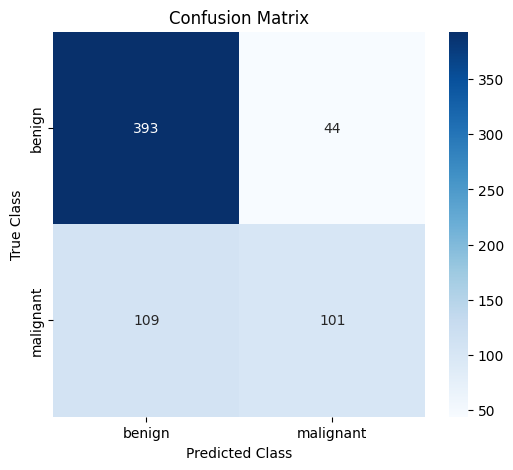

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.7154 | Recall=0.1429 | Precision=0.8571 | Specificity=0.9886 | F1_macro=0.2449 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6832
Average recall:       0.0286
Average precision:    0.8571
Average specificity:  0.9977
Average f1:           0.0553



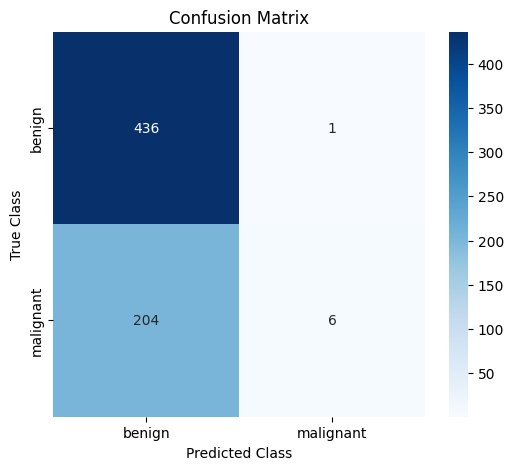

Testing params: {'dropout_rate': 0.25, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.7077 | Recall=0.1190 | Precision=0.8333 | Specificity=0.9886 | F1_macro=0.2083 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.7519 | Recall=0.3095 | Precision=0.8125 | Specificity=0.9655 | F1_macro=0.4483 
Average accuracy:     0.6971
Average recall:       0.0857
Average precision:    0.8182
Average specificity:  0.9908
Average f1:           0.1552



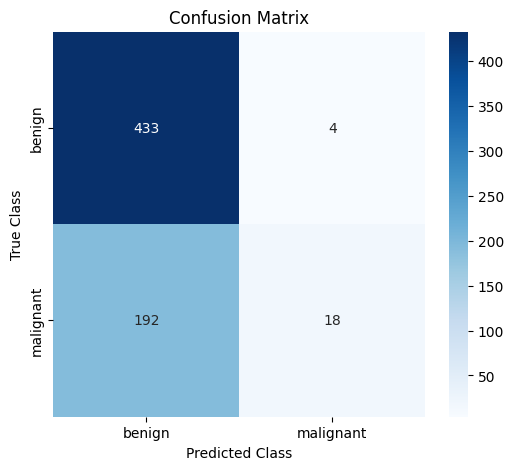

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7385 | Recall=0.5238 | Precision=0.6111 | Specificity=0.8409 | F1_macro=0.5641 
  Fold 2 | n=130 | Accuracy=0.8000 | Recall=0.4762 | Precision=0.8333 | Specificity=0.9545 | F1_macro=0.6061 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.4762 | Precision=0.8333 | Specificity=0.9540 | F1_macro=0.6061 
  Fold 4 | n=129 | Accuracy=0.7752 | Recall=0.5000 | Precision=0.7241 | Specificity=0.9080 | F1_macro=0.5915 
  Fold 5 | n=129 | Accuracy=0.7829 | Recall=0.3810 | Precision=0.8889 | Specificity=0.9770 | F1_macro=0.5333 
Average accuracy:     0.7790
Average recall:       0.4714
Average precision:    0.7557
Average specificity:  0.9269
Average f1:           0.5806



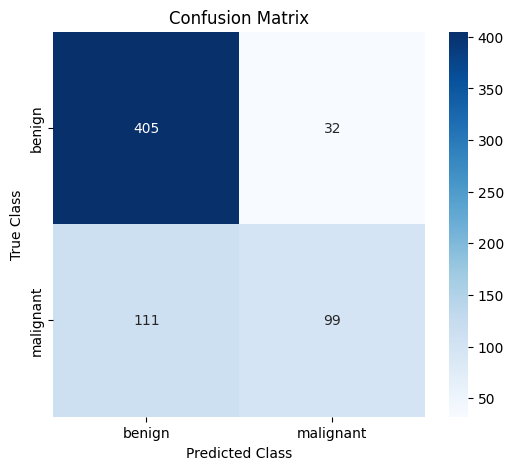

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7538 | Recall=0.3571 | Precision=0.7500 | Specificity=0.9432 | F1_macro=0.4839 
  Fold 2 | n=130 | Accuracy=0.8077 | Recall=0.5476 | Precision=0.7931 | Specificity=0.9318 | F1_macro=0.6479 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.4048 | Precision=0.9444 | Specificity=0.9885 | F1_macro=0.5667 
  Fold 4 | n=129 | Accuracy=0.7674 | Recall=0.4762 | Precision=0.7143 | Specificity=0.9080 | F1_macro=0.5714 
  Fold 5 | n=129 | Accuracy=0.7829 | Recall=0.4048 | Precision=0.8500 | Specificity=0.9655 | F1_macro=0.5484 
Average accuracy:     0.7821
Average recall:       0.4381
Average precision:    0.8000
Average specificity:  0.9474
Average f1:           0.5662



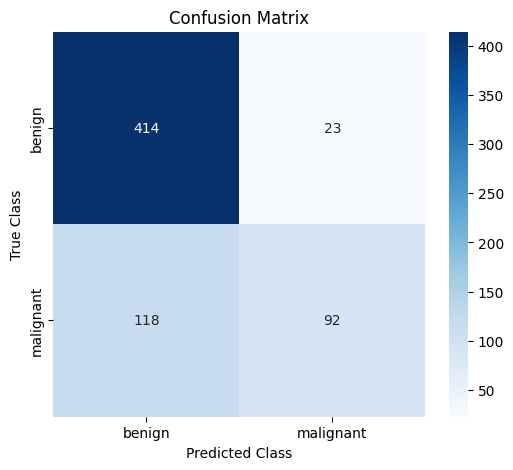

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.3810 | Precision=0.8000 | Specificity=0.9545 | F1_macro=0.5161 
  Fold 2 | n=130 | Accuracy=0.7923 | Recall=0.4048 | Precision=0.8947 | Specificity=0.9773 | F1_macro=0.5574 
  Fold 3 | n=129 | Accuracy=0.8217 | Recall=0.5476 | Precision=0.8519 | Specificity=0.9540 | F1_macro=0.6667 
  Fold 4 | n=129 | Accuracy=0.7519 | Recall=0.5000 | Precision=0.6562 | Specificity=0.8736 | F1_macro=0.5676 
  Fold 5 | n=129 | Accuracy=0.7364 | Recall=0.4762 | Precision=0.6250 | Specificity=0.8621 | F1_macro=0.5405 
Average accuracy:     0.7743
Average recall:       0.4619
Average precision:    0.7462
Average specificity:  0.9243
Average f1:           0.5706



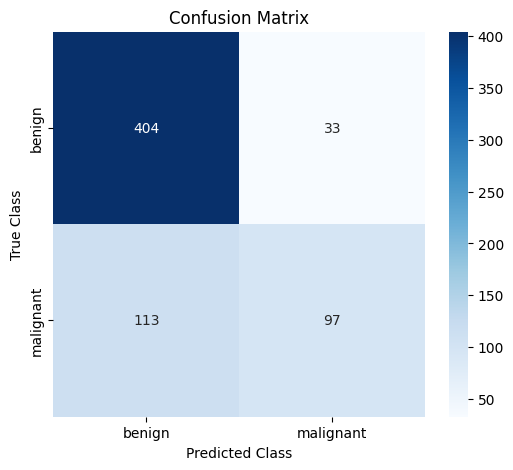

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.3810 | Precision=0.8000 | Specificity=0.9545 | F1_macro=0.5161 
  Fold 2 | n=130 | Accuracy=0.8154 | Recall=0.4762 | Precision=0.9091 | Specificity=0.9773 | F1_macro=0.6250 
  Fold 3 | n=129 | Accuracy=0.7752 | Recall=0.3095 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.4727 
  Fold 4 | n=129 | Accuracy=0.8217 | Recall=0.7143 | Precision=0.7317 | Specificity=0.8736 | F1_macro=0.7229 
  Fold 5 | n=129 | Accuracy=0.7364 | Recall=0.4286 | Precision=0.6429 | Specificity=0.8851 | F1_macro=0.5143 
Average accuracy:     0.7836
Average recall:       0.4619
Average precision:    0.7823
Average specificity:  0.9381
Average f1:           0.5808



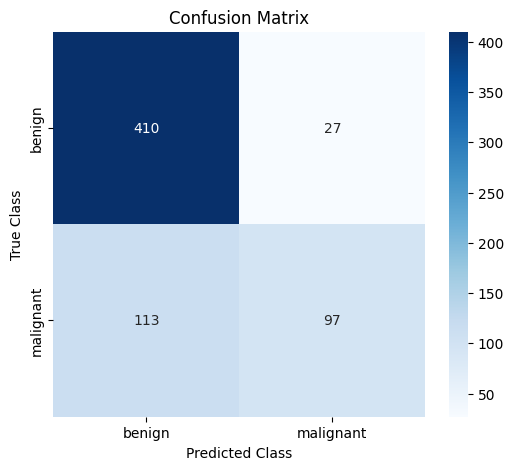

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



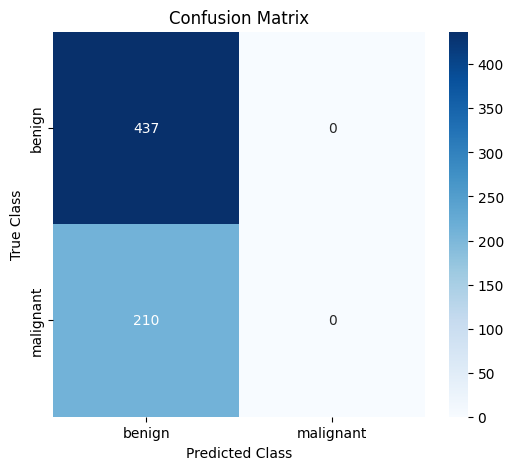

Testing params: {'dropout_rate': 0.25, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



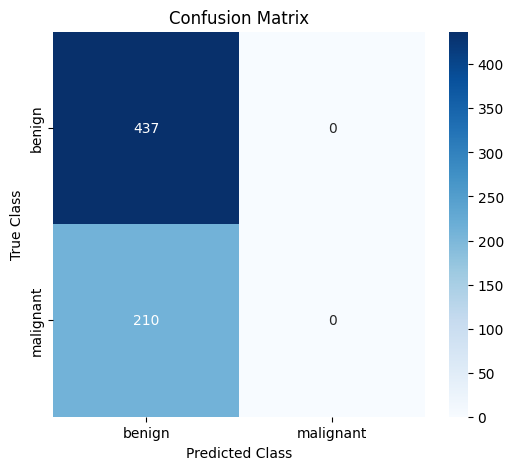

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.5000 | Precision=0.7000 | Specificity=0.8977 | F1_macro=0.5833 
  Fold 2 | n=130 | Accuracy=0.8154 | Recall=0.5714 | Precision=0.8000 | Specificity=0.9318 | F1_macro=0.6667 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.7519 | Recall=0.5714 | Precision=0.6316 | Specificity=0.8391 | F1_macro=0.6000 
  Fold 5 | n=129 | Accuracy=0.7752 | Recall=0.4286 | Precision=0.7826 | Specificity=0.9425 | F1_macro=0.5538 
Average accuracy:     0.7573
Average recall:       0.4143
Average precision:    0.7190
Average specificity:  0.9222
Average f1:           0.5257



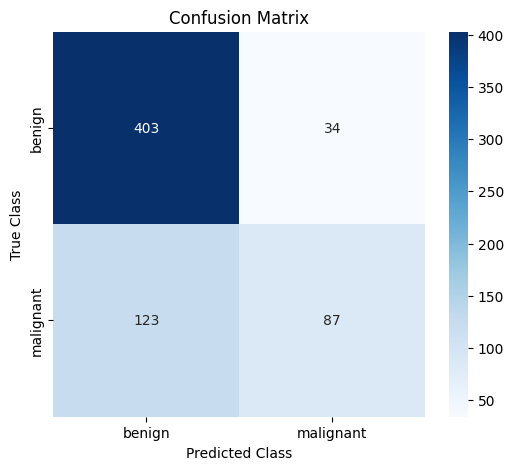

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7692 | Recall=0.5476 | Precision=0.6765 | Specificity=0.8750 | F1_macro=0.6053 
  Fold 2 | n=130 | Accuracy=0.8077 | Recall=0.5714 | Precision=0.7742 | Specificity=0.9205 | F1_macro=0.6575 
  Fold 3 | n=129 | Accuracy=0.7984 | Recall=0.4524 | Precision=0.8636 | Specificity=0.9655 | F1_macro=0.5938 
  Fold 4 | n=129 | Accuracy=0.7752 | Recall=0.6667 | Precision=0.6512 | Specificity=0.8276 | F1_macro=0.6588 
  Fold 5 | n=129 | Accuracy=0.7984 | Recall=0.3810 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.5517 
Average accuracy:     0.7898
Average recall:       0.5238
Average precision:    0.7534
Average specificity:  0.9177
Average f1:           0.6180



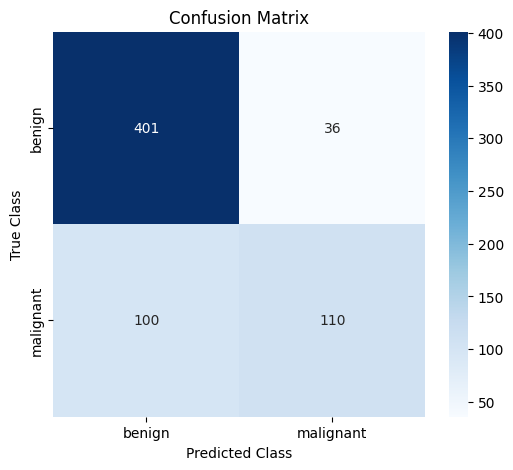

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7615 | Recall=0.3333 | Precision=0.8235 | Specificity=0.9659 | F1_macro=0.4746 
  Fold 2 | n=130 | Accuracy=0.7538 | Recall=0.3571 | Precision=0.7500 | Specificity=0.9432 | F1_macro=0.4839 
  Fold 3 | n=129 | Accuracy=0.7674 | Recall=0.3810 | Precision=0.8000 | Specificity=0.9540 | F1_macro=0.5161 
  Fold 4 | n=129 | Accuracy=0.7519 | Recall=0.4286 | Precision=0.6923 | Specificity=0.9080 | F1_macro=0.5294 
  Fold 5 | n=129 | Accuracy=0.7209 | Recall=0.4286 | Precision=0.6000 | Specificity=0.8621 | F1_macro=0.5000 
Average accuracy:     0.7512
Average recall:       0.3857
Average precision:    0.7168
Average specificity:  0.9266
Average f1:           0.5015



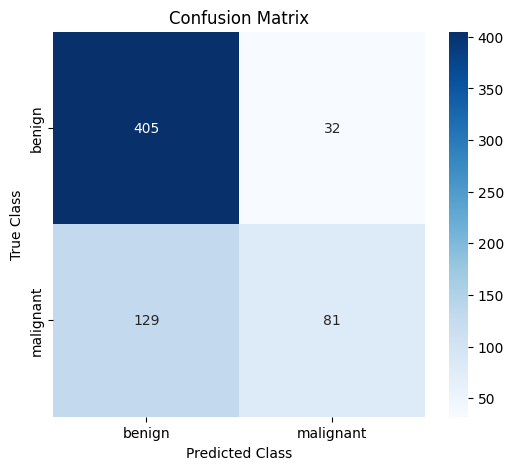

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.2619 | Precision=0.8462 | Specificity=0.9773 | F1_macro=0.4000 
  Fold 2 | n=130 | Accuracy=0.7538 | Recall=0.3571 | Precision=0.7500 | Specificity=0.9432 | F1_macro=0.4839 
  Fold 3 | n=129 | Accuracy=0.7752 | Recall=0.4048 | Precision=0.8095 | Specificity=0.9540 | F1_macro=0.5397 
  Fold 4 | n=129 | Accuracy=0.7829 | Recall=0.3810 | Precision=0.8889 | Specificity=0.9770 | F1_macro=0.5333 
  Fold 5 | n=129 | Accuracy=0.7752 | Recall=0.3333 | Precision=0.9333 | Specificity=0.9885 | F1_macro=0.4912 
Average accuracy:     0.7666
Average recall:       0.3476
Average precision:    0.8391
Average specificity:  0.9680
Average f1:           0.4916



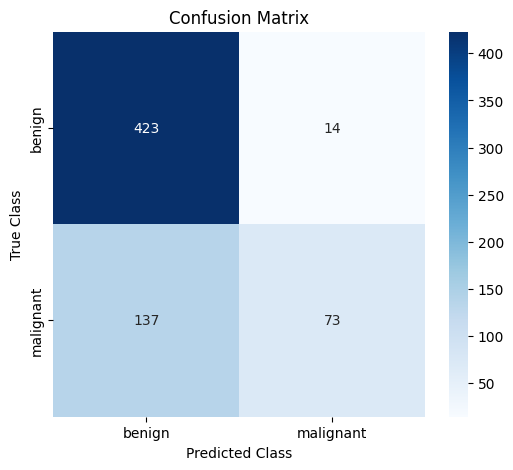

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



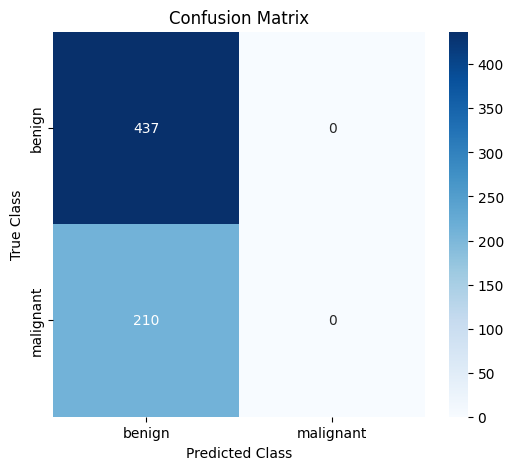

Testing params: {'dropout_rate': 0.5, 'lr': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6822 | Recall=0.0476 | Precision=0.6667 | Specificity=0.9885 | F1_macro=0.0889 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6512 | Recall=0.5238 | Precision=0.4681 | Specificity=0.7126 | F1_macro=0.4944 
Average accuracy:     0.6723
Average recall:       0.1143
Average precision:    0.4800
Average specificity:  0.9402
Average f1:           0.1846



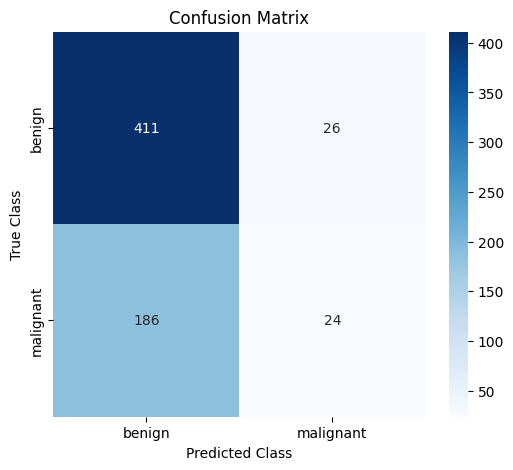

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7538 | Recall=0.4524 | Precision=0.6786 | Specificity=0.8977 | F1_macro=0.5429 
  Fold 2 | n=130 | Accuracy=0.8000 | Recall=0.5476 | Precision=0.7667 | Specificity=0.9205 | F1_macro=0.6389 
  Fold 3 | n=129 | Accuracy=0.8140 | Recall=0.5952 | Precision=0.7812 | Specificity=0.9195 | F1_macro=0.6757 
  Fold 4 | n=129 | Accuracy=0.7674 | Recall=0.4286 | Precision=0.7500 | Specificity=0.9310 | F1_macro=0.5455 
  Fold 5 | n=129 | Accuracy=0.6899 | Recall=0.5476 | Precision=0.5227 | Specificity=0.7586 | F1_macro=0.5349 
Average accuracy:     0.7651
Average recall:       0.5143
Average precision:    0.6835
Average specificity:  0.8855
Average f1:           0.5870



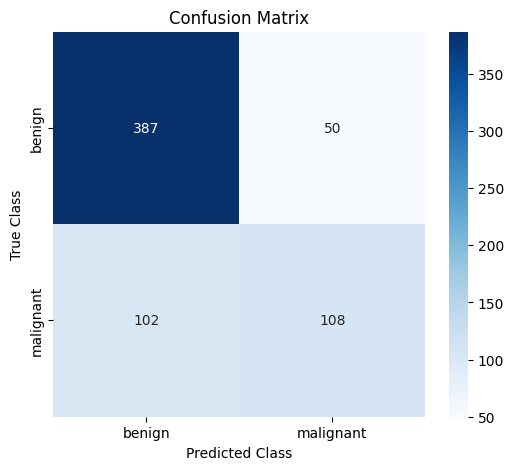

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'AdamW', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7538 | Recall=0.4048 | Precision=0.7083 | Specificity=0.9205 | F1_macro=0.5152 
  Fold 2 | n=130 | Accuracy=0.7385 | Recall=0.2381 | Precision=0.8333 | Specificity=0.9773 | F1_macro=0.3704 
  Fold 3 | n=129 | Accuracy=0.8140 | Recall=0.6429 | Precision=0.7500 | Specificity=0.8966 | F1_macro=0.6923 
  Fold 4 | n=129 | Accuracy=0.7674 | Recall=0.3571 | Precision=0.8333 | Specificity=0.9655 | F1_macro=0.5000 
  Fold 5 | n=129 | Accuracy=0.7287 | Recall=0.4048 | Precision=0.6296 | Specificity=0.8851 | F1_macro=0.4928 
Average accuracy:     0.7604
Average recall:       0.4095
Average precision:    0.7350
Average specificity:  0.9290
Average f1:           0.5260



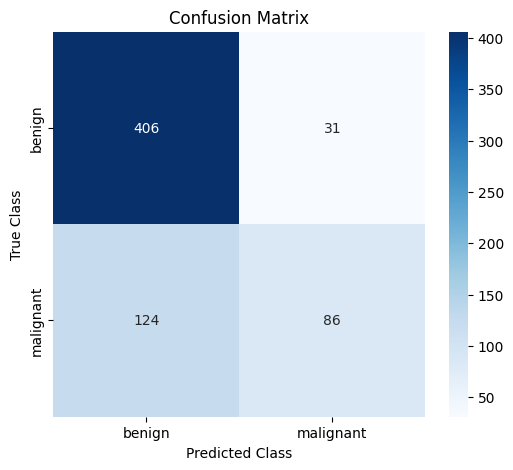

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.7462 | Recall=0.4048 | Precision=0.6800 | Specificity=0.9091 | F1_macro=0.5075 
  Fold 2 | n=130 | Accuracy=0.8077 | Recall=0.4762 | Precision=0.8696 | Specificity=0.9659 | F1_macro=0.6154 
  Fold 3 | n=129 | Accuracy=0.7674 | Recall=0.6190 | Precision=0.6500 | Specificity=0.8391 | F1_macro=0.6341 
  Fold 4 | n=129 | Accuracy=0.7597 | Recall=0.6190 | Precision=0.6341 | Specificity=0.8276 | F1_macro=0.6265 
  Fold 5 | n=129 | Accuracy=0.6977 | Recall=0.4286 | Precision=0.5455 | Specificity=0.8276 | F1_macro=0.4800 
Average accuracy:     0.7558
Average recall:       0.5095
Average precision:    0.6605
Average specificity:  0.8739
Average f1:           0.5753



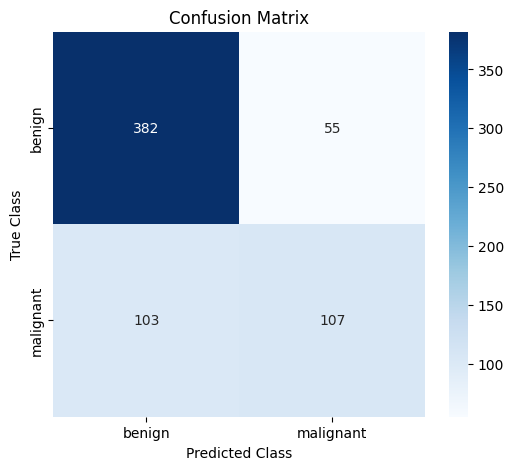

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.7538 | Recall=0.6190 | Precision=0.6190 | Specificity=0.8182 | F1_macro=0.6190 
  Fold 2 | n=130 | Accuracy=0.8231 | Recall=0.5714 | Precision=0.8276 | Specificity=0.9432 | F1_macro=0.6761 
  Fold 3 | n=129 | Accuracy=0.8062 | Recall=0.4762 | Precision=0.8696 | Specificity=0.9655 | F1_macro=0.6154 
  Fold 4 | n=129 | Accuracy=0.8062 | Recall=0.6667 | Precision=0.7179 | Specificity=0.8736 | F1_macro=0.6914 
  Fold 5 | n=129 | Accuracy=0.7752 | Recall=0.3095 | Precision=1.0000 | Specificity=1.0000 | F1_macro=0.4727 
Average accuracy:     0.7929
Average recall:       0.5286
Average precision:    0.7603
Average specificity:  0.9201
Average f1:           0.6236



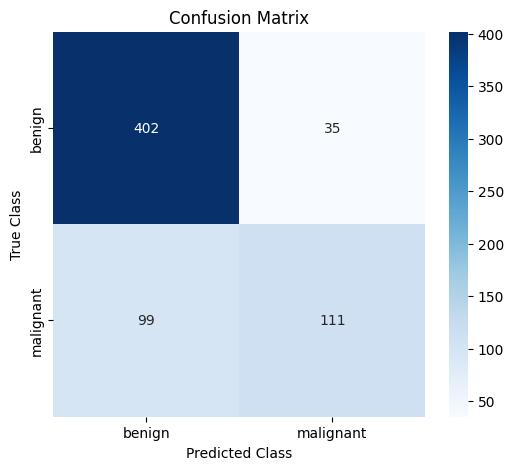

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



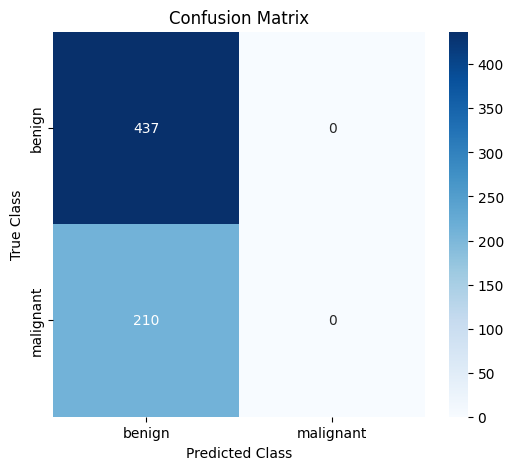

Testing params: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
  Fold 1 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 2 | n=130 | Accuracy=0.6769 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 3 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 4 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
  Fold 5 | n=129 | Accuracy=0.6744 | Recall=0.0000 | Precision=0.0000 | Specificity=1.0000 | F1_macro=0.0000 
Average accuracy:     0.6754
Average recall:       0.0000
Average precision:    0.0000
Average specificity:  1.0000
Average f1:           0.0000



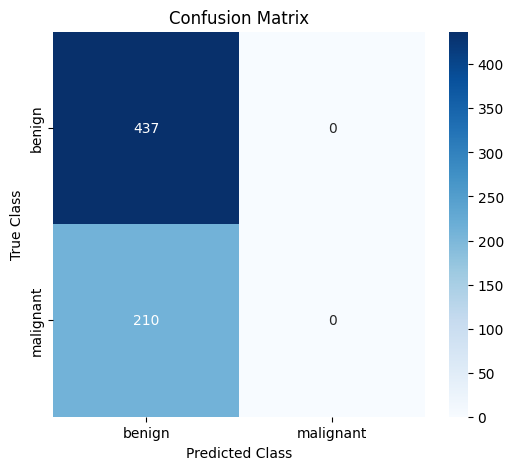

Best hyperparameters: {'dropout_rate': 0.5, 'lr': 0.0001, 'optimizer': 'Adam', 'weight_decay': 0.0001, 'avg_accuracy': 0.7928902627511591}
CPU times: user 3h 3min 6s, sys: 7min 25s, total: 3h 10min 32s
Wall time: 3h 54min 23s


In [ ]:
%%time

import warnings
warnings.filterwarnings('ignore')
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import ParameterGrid, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ====== SETUP ======
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== PATH SETUP ======
save_base = Path('/content/drive/MyDrive/CNPRM Workshop/saved_models_binary')

# ====== DEFINE TRANSFORMS ======
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

augmented_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ====== LOAD DATASET ======
full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
data_targets = [label for _, label in full_dataset]

classes = full_dataset.classes
num_classes = len(classes)

# ====== HYPERPARAMETER GRID ======
learning_rates = [1e-3, 1e-4]
weight_decays   = [0.0, 1e-4]
dropout_rates   = [0.0, 0.25, 0.5]
optimizers      = ['AdamW', 'Adam', 'SGD']

param_grid = {
    'lr': learning_rates,
    'weight_decay': weight_decays,
    'dropout_rate': dropout_rates,
    'optimizer': optimizers
}
grid = list(ParameterGrid(param_grid))

# ====== MODEL DEFINITION ======
class SimpleCNN(nn.Module):
    def __init__(self, dropout_rate):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 224, 224)
            n_features = self.features(dummy).view(1, -1).size(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_features, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 1)
        )
    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

# ====== NESTED CV: HYPERPARAMETER SEARCH ======
outer_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
all_results = []

for params in grid:
    test_acc = []
    test_recall = []
    test_precision = []
    test_specificity = []
    test_f1 = []

    all_preds = []
    all_actuals = []

    print(f"Testing params: {params}")

    # directory for this combination
    combo_name = f"model4_lr{params['lr']}_wd{params['weight_decay']}_dr{params['dropout_rate']}_opt{params['optimizer']}"
    combo_dir = save_base / combo_name
    combo_dir.mkdir(parents=True, exist_ok=True)

    for fold, (train_val_idx, test_idx) in enumerate(outer_skf.split(np.zeros(len(full_dataset)), data_targets), 1):
        # inner split: train vs val (25% of train_val = validation)
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=seed + fold)
        train_idx_inner, val_idx_inner = next(
            sss.split(train_val_idx, [data_targets[i] for i in train_val_idx])
        )

        train_idx = [train_val_idx[i] for i in train_idx_inner]
        val_idx   = [train_val_idx[i] for i in val_idx_inner]
        test_idx  = list(test_idx)

        # Subsets and loaders
        train_ds = Subset(datasets.ImageFolder(prepared_path, transform=augmented_transform), train_idx)
        val_ds   = Subset(datasets.ImageFolder(prepared_path, transform=transform), val_idx)
        test_ds  = Subset(datasets.ImageFolder(prepared_path, transform=transform), test_idx)

        train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
        val_loader   = DataLoader(val_ds,   batch_size=16, shuffle=False)
        test_loader  = DataLoader(test_ds,  batch_size=16, shuffle=False)

        # model, optimizer, loss
        model = SimpleCNN(params['dropout_rate']).to(device)
        optimizer = {
            'AdamW': optim.AdamW,
            'Adam': optim.Adam,
            'SGD': lambda p, lr, weight_decay: optim.SGD(p, lr=lr, weight_decay=weight_decay, momentum=0.9)
        }[params['optimizer']](model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
        criterion = nn.BCEWithLogitsLoss()

        # training with validation
        best_val_loss = float('inf')
        best_model_state = None

        for epoch in range(10):
            model.train()
            for imgs, labels in train_loader:
                imgs, labels = imgs.to(device), labels.float().unsqueeze(1).to(device)
                out = model(imgs)
                loss = criterion(out, labels)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Validation
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for imgs, labels in val_loader:
                    imgs, labels = imgs.to(device), labels.float().unsqueeze(1).to(device)
                    out = model(imgs)
                    loss = criterion(out, labels)
                    val_loss += loss.item() * imgs.size(0)
            val_loss /= len(val_loader.dataset)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = model.state_dict()

        # Load best model
        model.load_state_dict(best_model_state)
        model.eval()
        preds, actuals = [], []
        with torch.no_grad():
            for imgs, labels in test_loader:
                imgs = imgs.to(device)
                probs = torch.sigmoid(model(imgs)).cpu().numpy().flatten()
                preds.extend((probs > 0.5).astype(int).tolist())
                actuals.extend(labels.numpy().flatten().tolist())

        # Append to combined lists
        all_preds.extend(preds)
        all_actuals.extend(actuals)

        # compute metrics
        n = len(actuals)
        acc = accuracy_score(actuals, preds)
        precision = precision_score(actuals, preds, zero_division=0)
        recall = recall_score(actuals, preds, zero_division=0)
        f1 = f1_score(actuals, preds, average='binary', zero_division=0)
        cm = confusion_matrix(actuals, preds)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        else:
            specificity = None

        print(
            f"  Fold {fold} | n={n} "
            f"| Accuracy={acc:.4f} "
            f"| Recall={recall:.4f} "
            f"| Precision={precision:.4f} "
            f"| Specificity={specificity:.4f} "
            f"| F1_macro={f1:.4f} "
        )
        test_acc.append(acc)
        test_recall.append(recall)
        test_precision.append(precision)
        test_specificity.append(specificity)
        test_f1.append(f1)

        # Save best model
        model_path = combo_dir / f"fold_{fold}.pt"
        torch.save(best_model_state, model_path)

    global_acc = accuracy_score(all_actuals, all_preds)
    global_recall = recall_score(all_actuals, all_preds, zero_division=0)
    global_precision = precision_score(all_actuals, all_preds, zero_division=0)
    global_specificity = np.mean(test_specificity)
    global_f1 = f1_score(all_actuals, all_preds, average='binary', zero_division=0)
    print(f"Average accuracy:     {global_acc:.4f}")
    print(f"Average recall:       {global_recall:.4f}")
    print(f"Average precision:    {global_precision:.4f}")
    print(f"Average specificity:  {global_specificity:.4f}")
    print(f"Average f1:           {global_f1:.4f}\n")
    all_results.append({**params, 'avg_accuracy': global_acc})

    final_cm = confusion_matrix(all_actuals, all_preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

# Best hyperparameters
best = max(all_results, key=lambda x: x['avg_accuracy'])
print("Best hyperparameters:", best)


# Model 5 (ResNet-50 pre-trained)

In [ ]:
%%time

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, accuracy_score)
import numpy as np
import random

# ====== SETUP ======
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== DEFINE TRANSFORMS ======
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

augmented_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ====== LOAD DATASET WITHOUT TRANSFORM INITIALLY ======
full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
full_targets = [sample[1] for sample in full_dataset]

# ====== CROSS-VALIDATION SETUP ======
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ====== MODEL DEFINITION ======
def get_resnet50_model():
    model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    for param in model.parameters():
        param.requires_grad = False
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 2)
    )
    return model

# ====== HYPERPARAMETER SEARCH ======
learning_rates = [1e-3, 1e-4]
weight_decays = [0.0, 1e-4]

best_accuracy = 0.0
best_hparams = ""
best_lr = None
best_wd = None
best_models = []

for lr in learning_rates:
    for wd in weight_decays:
        print(f"Testing: lr={lr}, wd={wd}")
        fold_accuracies = []
        current_models = []

        for fold, (train_val_idx, test_idx) in enumerate(skf.split(np.zeros(len(full_targets)), full_targets)):
            train_val_labels = [full_targets[i] for i in train_val_idx]
            train_idx, val_idx = train_test_split(
                train_val_idx,
                test_size=0.25,  # 25% of 80% = 20% of full set
                stratify=train_val_labels,
                random_state=42
            )

            model = get_resnet50_model().to(device)
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
            criterion = nn.CrossEntropyLoss()

            train_subset = Subset(full_dataset, train_idx)
            val_subset = Subset(full_dataset, val_idx)
            test_subset = Subset(full_dataset, test_idx)

            train_subset.dataset.transform = augmented_transform
            val_subset.dataset.transform = transform
            test_subset.dataset.transform = transform

            train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
            val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)
            test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

            for epoch in range(10):
                model.train()
                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            model.eval()
            all_preds, all_labels = [], []
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    _, predicted = outputs.max(1)
                    all_preds.extend(predicted.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            fold_accuracy = accuracy_score(all_labels, all_preds)
            fold_accuracies.append(fold_accuracy)
            current_models.append(model.state_dict())

        avg_accuracy = np.mean(fold_accuracies)
        print(f"Average Accuracy across folds: {avg_accuracy:.4f}")

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_lr = lr
            best_wd = wd
            resnet50_best_hparams = f"model5_resnet50_lr{lr}_wd{wd}"
            best_models = current_models
            print("[INFO] New best hyperparameter set found!\n")

# ====== SAVE BEST MODELS ======
save_dir = "/content/drive/MyDrive/CNPRM Workshop/saved_models_binary"
os.makedirs(save_dir, exist_ok=True)

print(f"\n[RESULT] Best Accuracy: {best_accuracy:.4f} with hyperparams: {resnet50_best_hparams}")
for fold, model_state in enumerate(best_models):
    fold_model_path = os.path.join(save_dir, f"{resnet50_best_hparams}_fold{fold}.pt")
    torch.save(model_state, fold_model_path)
    print(f"✔️ Saved model for fold {fold} to {fold_model_path}")


Testing: lr=0.001, wd=0.0


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


Average Accuracy across folds: 0.7800
[INFO] New best hyperparameter set found!

Testing: lr=0.001, wd=0.0001
Average Accuracy across folds: 0.7877
[INFO] New best hyperparameter set found!

Testing: lr=0.0001, wd=0.0
Average Accuracy across folds: 0.7585
Testing: lr=0.0001, wd=0.0001
Average Accuracy across folds: 0.7569

[RESULT] Best Accuracy: 0.7877 with hyperparams: model5_resnet50_lr0.001_wd0.0001
✔️ Saved model for fold 0 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model5_resnet50_lr0.001_wd0.0001_fold0.pt
✔️ Saved model for fold 1 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model5_resnet50_lr0.001_wd0.0001_fold1.pt
✔️ Saved model for fold 2 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model5_resnet50_lr0.001_wd0.0001_fold2.pt
✔️ Saved model for fold 3 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model5_resnet50_lr0.001_wd0.0001_fold3.pt
✔️ Saved model for fold 4 to /content/drive/MyDrive/CNPRM Workshop/saved_mode

Evaluating Fold 1 on Test Set


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


Evaluating Fold 2 on Test Set
Evaluating Fold 3 on Test Set
Evaluating Fold 4 on Test Set
Evaluating Fold 5 on Test Set

📊 Overall Evaluation Metrics on Combined Test Sets:
  ➤ Accuracy:     0.8006
  ➤ Precision:    0.6995
  ➤ Recall:       0.6762
  ➤ Specificity:  0.8604
  ➤ F1-score:     0.6877

Per-Fold Metrics:
Fold 1:
  Class: benign
    ➤ Support (n): 88
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8077
  ➤ Precision:    0.6667
  ➤ Recall:       0.8095
  ➤ Specificity:  0.8068
  ➤ F1-score:     0.7312

Fold 2:
  Class: benign
    ➤ Support (n): 88
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8385
  ➤ Precision:    0.8387
  ➤ Recall:       0.6190
  ➤ Specificity:  0.9432
  ➤ F1-score:     0.7123

Fold 3:
  Class: benign
    ➤ Support (n): 87
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8140
  ➤ Precision:    0.6607
  ➤ Recall:       0.8810
  ➤ Specificity:  0.7816
  ➤ F1-score:     0.7551

Fold 4:
  Class: benign
    ➤ Support (n): 8

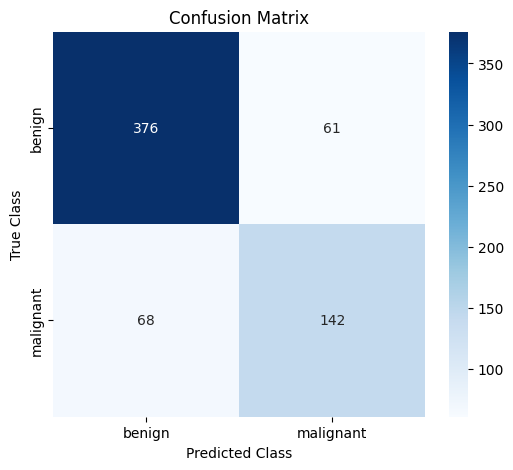

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from torch.utils.data import Subset, DataLoader
import numpy as np
import torch
from torchvision import models, transforms, datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import random
import torch.nn as nn

# Reload best model
def get_resnet50_model():
    model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 2)
    )
    return model

# Device setup
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Redefine test transform
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
full_targets = [sample[1] for sample in full_dataset]

full_dataset.transform = test_transform

# ====== CROSS-VALIDATION SETUP ======
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate on each fold's test set
all_preds, all_labels = [], []
fold_metrics = []

for fold, (train_val_idx, test_idx) in enumerate(skf.split(np.zeros(len(full_targets)), full_targets)):
    print(f"Evaluating Fold {fold + 1} on Test Set")

    model_path = f"/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model5_resnet50_lr0.001_wd0.0001_fold{fold}.pt"
    model = get_resnet50_model().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    test_subset = Subset(full_dataset, test_idx)
    test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

    fold_preds, fold_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            fold_preds.extend(predicted.cpu().numpy())
            fold_labels.extend(labels.cpu().numpy())

    all_preds.extend(fold_preds)
    all_labels.extend(fold_labels)

    # Per-fold metrics
    fold_accuracy = accuracy_score(fold_labels, fold_preds)
    fold_f1 = f1_score(fold_labels, fold_preds, average='binary')
    fold_precision = precision_score(fold_labels, fold_preds)
    fold_recall = recall_score(fold_labels, fold_preds)

    # Specificity calculation (per class)
    cm = confusion_matrix(fold_labels, fold_preds)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    class_counts = np.bincount(fold_labels, minlength=len(full_dataset.classes))

    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': fold_accuracy,
        'f1': fold_f1,
        'precision': fold_precision,
        'recall': fold_recall,
        'specificity': specificity,
        'support': class_counts
    })

# ====== Average Metrics ======
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='binary')
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)

# Specificity calculation (global)
cm_total = confusion_matrix(all_labels, all_preds)
tn, fp, fn, tp = cm_total.ravel() if cm_total.shape == (2, 2) else (0, 0, 0, 0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(f"\n📊 Overall Evaluation Metrics on Combined Test Sets:")
print(f"  ➤ Accuracy:     {accuracy:.4f}")
print(f"  ➤ Precision:    {precision:.4f}")
print(f"  ➤ Recall:       {recall:.4f}")
print(f"  ➤ Specificity:  {specificity:.4f}")
print(f"  ➤ F1-score:     {f1:.4f}\n")

print("Per-Fold Metrics:")
for m in fold_metrics:
    print(f"Fold {m['fold']}:")
    print(f"  Class: benign\n    ➤ Support (n): {m['support'][0]}")
    print(f"  Class: malignant\n    ➤ Support (n): {m['support'][1]}")
    print(f"  ➤ Accuracy:     {m['accuracy']:.4f}")
    print(f"  ➤ Precision:    {m['precision']:.4f}")
    print(f"  ➤ Recall:       {m['recall']:.4f}")
    print(f"  ➤ Specificity:  {m['specificity']:.4f}")
    print(f"  ➤ F1-score:     {m['f1']:.4f}\n")

# ====== Confusion Matrix ======
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Model 6 (VGG-19 pre-trained)

In [ ]:
%%time

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, accuracy_score)
import numpy as np
import random

# ====== SETUP ======
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== DEFINE TRANSFORMS ======
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

augmented_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ====== LOAD DATASET WITHOUT TRANSFORM INITIALLY ======
full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
full_targets = [sample[1] for sample in full_dataset]

# ====== CROSS-VALIDATION SETUP ======
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ====== MODEL DEFINITION ======
def get_vgg19_model():
    model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
    for param in model.features.parameters():
        param.requires_grad = False
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)
    return model

# ====== HYPERPARAMETER SEARCH ======
learning_rates = [1e-3, 1e-4]
weight_decays = [0.0, 1e-4]

best_accuracy = 0.0
best_hparams = ""
best_lr = None
best_wd = None
best_models = []

for lr in learning_rates:
    for wd in weight_decays:
        print(f"Testing: lr={lr}, wd={wd}")
        fold_accuracies = []
        current_models = []

        for fold, (train_val_idx, test_idx) in enumerate(skf.split(np.zeros(len(full_targets)), full_targets)):
            train_val_labels = [full_targets[i] for i in train_val_idx]
            train_idx, val_idx = train_test_split(
                train_val_idx,
                test_size=0.25,  # 25% of 80% = 20% of full set
                stratify=train_val_labels,
                random_state=42
            )

            model = get_vgg19_model().to(device)
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
            criterion = nn.CrossEntropyLoss()

            train_subset = Subset(full_dataset, train_idx)
            val_subset = Subset(full_dataset, val_idx)
            test_subset = Subset(full_dataset, test_idx)

            train_subset.dataset.transform = augmented_transform
            val_subset.dataset.transform = transform
            test_subset.dataset.transform = transform

            train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
            val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)
            test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

            for epoch in range(10):
                model.train()
                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            model.eval()
            all_preds, all_labels = [], []
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    _, predicted = outputs.max(1)
                    all_preds.extend(predicted.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            fold_accuracy = accuracy_score(all_labels, all_preds)
            fold_accuracies.append(fold_accuracy)
            current_models.append(model.state_dict())

        avg_accuracy = np.mean(fold_accuracies)
        print(f"Average Accuracy across folds: {avg_accuracy:.4f}")

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_lr = lr
            best_wd = wd
            vgg19_best_hparams = f"model6_vgg19_lr{lr}_wd{wd}"
            best_models = current_models
            print("[INFO] New best hyperparameter set found!\n")

# ====== SAVE BEST MODELS ======
save_dir = "/content/drive/MyDrive/CNPRM Workshop/saved_models_binary"
os.makedirs(save_dir, exist_ok=True)

print(f"\n[RESULT] Best Accuracy: {best_accuracy:.4f} with hyperparams: {vgg19_best_hparams}")
for fold, model_state in enumerate(best_models):
    fold_model_path = os.path.join(save_dir, f"{vgg19_best_hparams}_fold{fold}.pt")
    torch.save(model_state, fold_model_path)
    print(f"✔️ Saved model for fold {fold} to {fold_model_path}")


Testing: lr=0.001, wd=0.0


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 113MB/s] 


Average Accuracy across folds: 0.8262
[INFO] New best hyperparameter set found!

Testing: lr=0.001, wd=0.0001
Average Accuracy across folds: 0.8200
Testing: lr=0.0001, wd=0.0
Average Accuracy across folds: 0.8615
[INFO] New best hyperparameter set found!

Testing: lr=0.0001, wd=0.0001
Average Accuracy across folds: 0.8431

[RESULT] Best Accuracy: 0.8615 with hyperparams: model6_vgg19_lr0.0001_wd0.0
✔️ Saved model for fold 0 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr0.0001_wd0.0_fold0.pt
✔️ Saved model for fold 1 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr0.0001_wd0.0_fold1.pt
✔️ Saved model for fold 2 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr0.0001_wd0.0_fold2.pt
✔️ Saved model for fold 3 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr0.0001_wd0.0_fold3.pt
✔️ Saved model for fold 4 to /content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr

Evaluating Fold 1 on Test Set


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 66.1MB/s]


Evaluating Fold 2 on Test Set
Evaluating Fold 3 on Test Set
Evaluating Fold 4 on Test Set
Evaluating Fold 5 on Test Set

📊 Overall Evaluation Metrics on Combined Test Sets:
  ➤ Accuracy:     0.8532
  ➤ Precision:    0.7919
  ➤ Recall:       0.7429
  ➤ Specificity:  0.9062
  ➤ F1-score:     0.7666

Per-Fold Metrics:
Fold 1:
  Class: benign
    ➤ Support (n): 88
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8538
  ➤ Precision:    0.7556
  ➤ Recall:       0.8095
  ➤ Specificity:  0.8750
  ➤ F1-score:     0.7816

Fold 2:
  Class: benign
    ➤ Support (n): 88
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8154
  ➤ Precision:    0.8462
  ➤ Recall:       0.5238
  ➤ Specificity:  0.9545
  ➤ F1-score:     0.6471

Fold 3:
  Class: benign
    ➤ Support (n): 87
  Class: malignant
    ➤ Support (n): 42
  ➤ Accuracy:     0.8837
  ➤ Precision:    0.8462
  ➤ Recall:       0.7857
  ➤ Specificity:  0.9310
  ➤ F1-score:     0.8148

Fold 4:
  Class: benign
    ➤ Support (n): 8

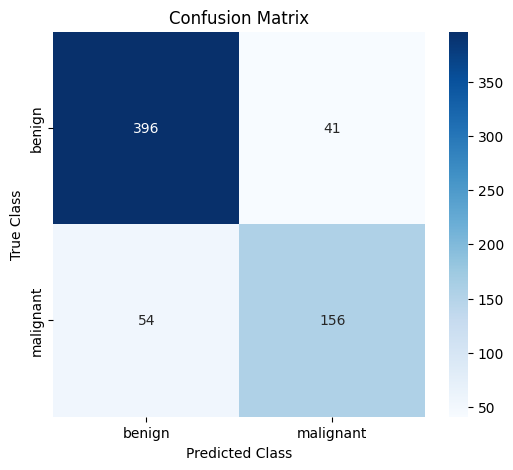

CPU times: user 27.4 s, sys: 7.55 s, total: 34.9 s
Wall time: 1min 15s


In [ ]:
%%time

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from torch.utils.data import Subset, DataLoader
import numpy as np
import torch
from torchvision import models, transforms, datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import os
import random
import torch.nn as nn

# Reload best model
def get_vgg19_model():
    model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
    for param in model.features.parameters():
        param.requires_grad = False
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)
    return model

# Device setup
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Redefine test transform
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=prepared_path, transform=None)
full_targets = [sample[1] for sample in full_dataset]

full_dataset.transform = test_transform

# ====== CROSS-VALIDATION SETUP ======
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate on each fold's test set
all_preds, all_labels = [], []
fold_metrics = []

for fold, (train_val_idx, test_idx) in enumerate(skf.split(np.zeros(len(full_targets)), full_targets)):
    print(f"Evaluating Fold {fold + 1} on Test Set")

    model_path = f"/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/model6_vgg19_lr0.0001_wd0.0_fold{fold}.pt"
    model = get_vgg19_model().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    test_subset = Subset(full_dataset, test_idx)
    test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

    fold_preds, fold_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            fold_preds.extend(predicted.cpu().numpy())
            fold_labels.extend(labels.cpu().numpy())

    all_preds.extend(fold_preds)
    all_labels.extend(fold_labels)

    # Per-fold metrics
    fold_accuracy = accuracy_score(fold_labels, fold_preds)
    fold_f1 = f1_score(fold_labels, fold_preds, average='binary')
    fold_precision = precision_score(fold_labels, fold_preds)
    fold_recall = recall_score(fold_labels, fold_preds)

    # Specificity calculation (per class)
    cm = confusion_matrix(fold_labels, fold_preds)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    class_counts = np.bincount(fold_labels, minlength=len(full_dataset.classes))

    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': fold_accuracy,
        'f1': fold_f1,
        'precision': fold_precision,
        'recall': fold_recall,
        'specificity': specificity,
        'support': class_counts
    })

# ====== Average Metrics ======
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='binary')
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)

# Specificity calculation (global)
cm_total = confusion_matrix(all_labels, all_preds)
tn, fp, fn, tp = cm_total.ravel() if cm_total.shape == (2, 2) else (0, 0, 0, 0)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(f"\n📊 Overall Evaluation Metrics on Combined Test Sets:")
print(f"  ➤ Accuracy:     {accuracy:.4f}")
print(f"  ➤ Precision:    {precision:.4f}")
print(f"  ➤ Recall:       {recall:.4f}")
print(f"  ➤ Specificity:  {specificity:.4f}")
print(f"  ➤ F1-score:     {f1:.4f}\n")

print("Per-Fold Metrics:")
for m in fold_metrics:
    print(f"Fold {m['fold']}:")
    print(f"  Class: benign\n    ➤ Support (n): {m['support'][0]}")
    print(f"  Class: malignant\n    ➤ Support (n): {m['support'][1]}")
    print(f"  ➤ Accuracy:     {m['accuracy']:.4f}")
    print(f"  ➤ Precision:    {m['precision']:.4f}")
    print(f"  ➤ Recall:       {m['recall']:.4f}")
    print(f"  ➤ Specificity:  {m['specificity']:.4f}")
    print(f"  ➤ F1-score:     {m['f1']:.4f}\n")

# ====== Confusion Matrix ======
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Explainable AI (XAI) on Model 6 (VGG-19)

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.5 MB/s 

In [ ]:
from pathlib import Path

for fold, (train_val_idx, test_idx) in enumerate(skf.split(np.zeros(len(full_targets)), full_targets)):
    # train_val_idx, test_idx are lists of indices INTO full_dataset

  # 1. Build a list of all file paths in the ImageFolder
  all_paths = [p for (p, _) in full_dataset.samples]

  # 2. Find the index corresponding to the file
  target_file = "benign (9).png"
  target_idx = next(i for i, p in enumerate(all_paths) if Path(p).name == target_file)

  # 3. For the fold you’re interested in, check membership
  if target_idx in train_val_idx:
      print("This image was in the TRAINING/VALIDATION set for fold", fold)
  elif target_idx in test_idx:
      print("This image was in the TESTING set for fold", fold)
  else:
      print("Something’s off — index not found in either split.")

This image was in the TRAINING/VALIDATION set for fold 0
This image was in the TRAINING/VALIDATION set for fold 1
This image was in the TESTING set for fold 2
This image was in the TRAINING/VALIDATION set for fold 3
This image was in the TRAINING/VALIDATION set for fold 4


In [ ]:
from pathlib import Path

img_path = Path("/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT/benign/benign (9).png")
true_label = img_path.parent.name  # → "benign"

preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])

img_pil      = Image.open("/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT/benign/benign (9).png").convert("RGB")
input_tensor = preprocess(img_pil).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    out       = model(input_tensor)
    pred_idx  = out.argmax(dim=1).item()
    # you still need the same `classes` list you used in training
    classes   = ["benign", "malignant"]
    pred_label = classes[pred_idx]

print(f"True label: {true_label}   |   Predicted: {pred_label}")


True label: benign   |   Predicted: benign


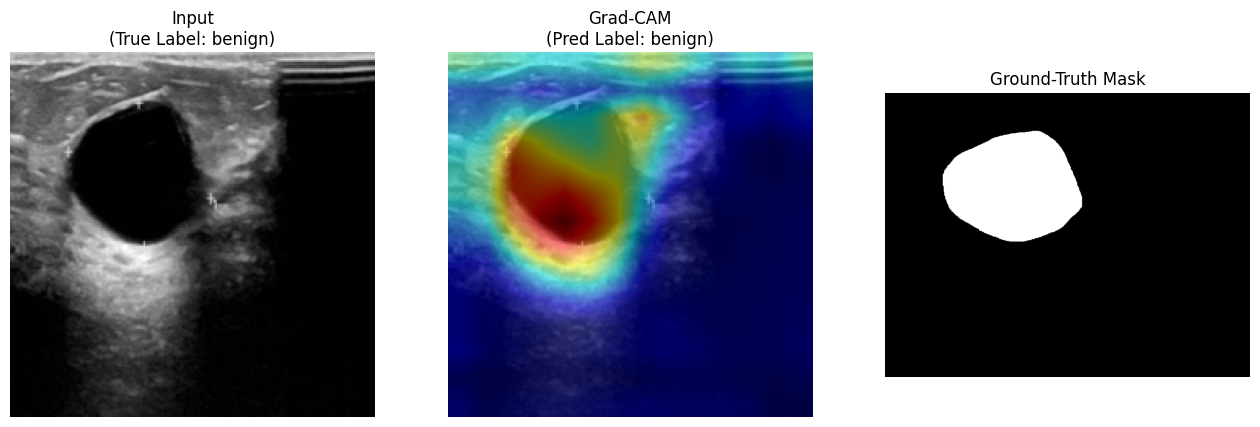

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms, models
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

# 0. Your model factory
def get_vgg19_model():
    model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
    # keep the feature extractor frozen
    for p in model.features.parameters():
        p.requires_grad = False
    model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)
    return model

model_path = f"/content/drive/MyDrive/CNPRM Workshop/saved_models_binary/{vgg19_best_hparams}_fold2.pt"

# 1. Load & prepare
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model     = get_vgg19_model().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# 2. Preprocess one image & enable grad on it
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])
img_pil      = Image.open("/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT/benign/benign (9).png").convert("RGB")
mask_pil     = Image.open("/content/drive/MyDrive/CNPRM Workshop/Dataset_BUSI_with_GT/benign/benign (9)_mask.png")
input_tensor = preprocess(img_pil).unsqueeze(0).to(device)
input_tensor.requires_grad_(True)   # ← critical so that gradients flow back

# 3. Instantiate the CAM (this registers forward + backward hooks)
target_layers = [model.features[35]]  # last conv layer in VGG-19
cam = GradCAM(
    model=model,
    target_layers=target_layers
)

# 4. Run Grad‐CAM
# passing `targets=None` will use the predicted class
grayscale_cam = cam(input_tensor=input_tensor, targets=None)[0]  # H×W numpy array

# 5. De‐normalize & overlay
inv_norm = transforms.Normalize(
    mean=[-m/s for m,s in zip([0.485,0.456,0.406],[0.229,0.224,0.225])],
    std =[1/s for s in [0.229,0.224,0.225]]
)
rgb_img  = inv_norm(input_tensor[0]) \
              .permute(1,2,0) \
              .cpu().detach().numpy() \
              .clip(0,1)

overlay = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# 6. Plot
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title(f"Input\n(True Label: {true_label})")
plt.imshow(rgb_img); plt.axis("off")

plt.subplot(1,3,2)
plt.title(f"Grad-CAM\n(Pred Label: {pred_label})")
plt.imshow(overlay); plt.axis("off")

plt.subplot(1,3,3)
plt.title("Ground‐Truth Mask")
plt.imshow(mask_pil); plt.axis("off")
plt.show()
